In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
#import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb
#import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
#from keras.utils import plot_model
#from keras.callbacks import EarlyStopping

In [4]:
df_default_loan = pd.read_csv("lending_club_loans.csv",skiprows=1,low_memory=False,engine='c') #load data

In [5]:
print(df_default_loan.shape) #get data shape - number of rows and columns

(42538, 115)


In [6]:
print(df_default_loan.head(10)) # print top 10 rows of the dataset

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   
5  1075269  1311441.0     5000.0       5000.0           5000.0   36 months   
6  1069639  1304742.0     7000.0       7000.0           7000.0   60 months   
7  1072053  1288686.0     3000.0       3000.0           3000.0   36 months   
8  1071795  1306957.0     5600.0       5600.0           5600.0   60 months   
9  1071570  1306721.0     5375.0       5375.0           5350.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.

# Check Duplicates

In [7]:
arr=df_default_loan['id'].unique()
print("No Duplicates" if (len(df_default_loan)==arr.size) else "Duplicates Found") #check for duplicate entries

No Duplicates


# Select Required columns

In [8]:
df_default_loan.corr() #select columns only with good correlation

member_id  loan_amnt  funded_amnt  \
member_id                    1.000000   0.156461     0.165351   
loan_amnt                    0.156461   1.000000     0.981746   
funded_amnt                  0.165351   0.981746     1.000000   
funded_amnt_inv              0.299733   0.929598     0.947525   
installment                  0.088503   0.930869     0.956522   
...                               ...        ...          ...   
tax_liens                   -0.012505  -0.005963    -0.006001   
tot_hi_cred_lim                   NaN        NaN          NaN   
total_bal_ex_mort                 NaN        NaN          NaN   
total_bc_limit                    NaN        NaN          NaN   
total_il_high_credit_limit        NaN        NaN          NaN   

                            funded_amnt_inv  installment  annual_inc  \
member_id                          0.299733     0.088503    0.010164   
loan_amnt                          0.929598     0.930869    0.276122   
funded_amnt                        0.947525     0.956522    0.272067   
funded_amnt_inv                    1.000000     0.890148    0.252338   
installment                        0.890148     1.000000    0.278339   
...                                     ...          ...         ...   
tax_liens                         -0.006242    -0.005929   -0.001828   
tot_hi_cred_lim                         NaN          NaN         NaN   
total_bal_ex_mort                       NaN          NaN         NaN   
total_bc_limit                          NaN          NaN         NaN   
total_il_high_credit_limit              NaN          NaN         NaN   

                                 dti  delinq_2yrs  fico_range_low  \
member_id                   0.079503    -0.025287        0.069328   
loan_amnt                   0.065112    -0.032767        0.133232   
funded_amnt                 0.064821    -0.033421        0.125637   
funded_amnt_inv             0.071086    -0.043863        0.144949   
installment                 0.054948    -0.020096        0.064362   
...                              ...          ...             ...   
tax_liens                  -0.003346    -0.001452       -0.009143   
tot_hi_cred_lim                  NaN          NaN             NaN   
total_bal_ex_mort                NaN          NaN             NaN   
total_bc_limit                   NaN          NaN             NaN   
total_il_high_credit_limit       NaN          NaN             NaN   

                            fico_range_high  ...  num_tl_90g_dpd_24m  \
member_id                          0.069328  ...                 NaN   
loan_amnt                          0.133232  ...                 NaN   
funded_amnt                        0.125637  ...                 NaN   
funded_amnt_inv                    0.144949  ...                 NaN   
installment                        0.064362  ...                 NaN   
...                                     ...  ...                 ...   
tax_liens                         -0.009143  ...                 NaN   
tot_hi_cred_lim                         NaN  ...                 NaN   
total_bal_ex_mort                       NaN  ...                 NaN   
total_bc_limit                          NaN  ...                 NaN   
total_il_high_credit_limit              NaN  ...                 NaN   

                            num_tl_op_past_12m  pct_tl_nvr_dlq  \
member_id                                  NaN             NaN   
loan_amnt                                  NaN             NaN   
funded_amnt                                NaN             NaN   
funded_amnt_inv                            NaN             NaN   
installment                                NaN             NaN   
...                                        ...             ...   
tax_liens                                  NaN             NaN   
tot_hi_cred_lim                            NaN             NaN   
total_bal_ex_mort                          NaN             NaN   
total_bc_limit              

In [9]:
df_default_loan=df_default_loan[['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                                 'annual_inc','verification_status','issue_d','loan_status','purpose','title','zip_code','addr_state','dti',
                                 'earliest_cr_line','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','application_type',
                                 'pub_rec_bankruptcies']]

In [10]:
print(df_default_loan.shape)

(42538, 26)


In [11]:
df_default_loan.describe() #main statistics of the dataset

loan_amnt   installment    annual_inc           dti      open_acc  \
count  42535.000000  42535.000000  4.253100e+04  42535.000000  42506.000000   
mean   11089.722581    322.623063  6.913656e+04     13.373043      9.343951   
std     7410.938391    208.927216  6.409635e+04      6.726315      4.496274   
min      500.000000     15.670000  1.896000e+03      0.000000      1.000000   
25%     5200.000000    165.520000  4.000000e+04      8.200000      6.000000   
50%     9700.000000    277.690000  5.900000e+04     13.470000      9.000000   
75%    15000.000000    428.180000  8.250000e+04     18.680000     12.000000   
max    35000.000000   1305.190000  6.000000e+06     29.990000     47.000000   

            pub_rec     revol_bal     total_acc  pub_rec_bankruptcies  
count  42506.000000  4.253500e+04  42506.000000          41170.000000  
mean       0.058156  1.429786e+04     22.124406              0.045227  
std        0.245713  2.201844e+04     11.592811              0.208737  
min        0.000000  0.000000e+00      1.000000              0.000000  
25%        0.000000  3.635000e+03     13.000000              0.000000  
50%        0.000000  8.821000e+03     20.000000              0.000000  
75%        0.000000  1.725100e+04     29.000000              0.000000  
max        5.000000  1.207359e+06     90.000000              2.000000

In [12]:
print(df_default_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   term                  42535 non-null  object 
 2   int_rate              42535 non-null  object 
 3   installment           42535 non-null  float64
 4   grade                 42535 non-null  object 
 5   sub_grade             42535 non-null  object 
 6   emp_length            41423 non-null  object 
 7   home_ownership        42535 non-null  object 
 8   annual_inc            42531 non-null  float64
 9   verification_status   42535 non-null  object 
 10  issue_d               42535 non-null  object 
 11  loan_status           42535 non-null  object 
 12  purpose               42535 non-null  object 
 13  title                 42522 non-null  object 
 14  zip_code              42535 non-null  object 
 15  addr_state         

# Handle Null Values

In [13]:
df_default_loan.replace([''],np.nan,inplace=True) #replace empty string with nan

In [14]:
print(df_default_loan.isnull().sum()) # count number of null rows of each column

loan_amnt                  3
term                       3
int_rate                   3
installment                3
grade                      3
sub_grade                  3
emp_length              1115
home_ownership             3
annual_inc                 7
verification_status        3
issue_d                    3
loan_status                3
purpose                    3
title                     16
zip_code                   3
addr_state                 3
dti                        3
earliest_cr_line          32
open_acc                  32
pub_rec                   32
revol_bal                  3
revol_util                93
total_acc                 32
initial_list_status        3
application_type           3
pub_rec_bankruptcies    1368
dtype: int64


<AxesSubplot:>

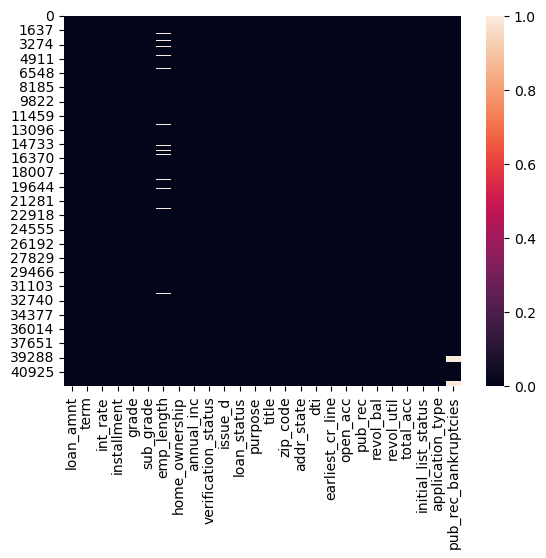

In [15]:
sns.heatmap(df_default_loan.isnull()) #heatmap for null values

In [16]:
df_default_loan[df_default_loan['application_type'].isnull()] #check the rows with null values of a column

loan_amnt term int_rate  installment grade sub_grade emp_length  \
39786        NaN  NaN      NaN          NaN   NaN       NaN        NaN   
42536        NaN  NaN      NaN          NaN   NaN       NaN        NaN   
42537        NaN  NaN      NaN          NaN   NaN       NaN        NaN   

      home_ownership  annual_inc verification_status  ... dti  \
39786            NaN         NaN                 NaN  ... NaN   
42536            NaN         NaN                 NaN  ... NaN   
42537            NaN         NaN                 NaN  ... NaN   

      earliest_cr_line open_acc pub_rec revol_bal revol_util  total_acc  \
39786              NaN      NaN     NaN       NaN        NaN        NaN   
42536              NaN      NaN     NaN       NaN        NaN        NaN   
42537              NaN      NaN     NaN       NaN        NaN        NaN   

      initial_list_status  application_type  pub_rec_bankruptcies  
39786                 NaN               NaN                   NaN  
42536                 NaN               NaN                   NaN  
42537                 NaN               NaN                   NaN  

[3 rows x 26 columns]

In [17]:
df_default_loan[df_default_loan['loan_amnt'].isnull()]

loan_amnt term int_rate  installment grade sub_grade emp_length  \
39786        NaN  NaN      NaN          NaN   NaN       NaN        NaN   
42536        NaN  NaN      NaN          NaN   NaN       NaN        NaN   
42537        NaN  NaN      NaN          NaN   NaN       NaN        NaN   

      home_ownership  annual_inc verification_status  ... dti  \
39786            NaN         NaN                 NaN  ... NaN   
42536            NaN         NaN                 NaN  ... NaN   
42537            NaN         NaN                 NaN  ... NaN   

      earliest_cr_line open_acc pub_rec revol_bal revol_util  total_acc  \
39786              NaN      NaN     NaN       NaN        NaN        NaN   
42536              NaN      NaN     NaN       NaN        NaN        NaN   
42537              NaN      NaN     NaN       NaN        NaN        NaN   

      initial_list_status  application_type  pub_rec_bankruptcies  
39786                 NaN               NaN                   NaN  
42536                 NaN               NaN                   NaN  
42537                 NaN               NaN                   NaN  

[3 rows x 26 columns]

# Replace with Median

In [18]:
df_default_loan['open_acc']=df_default_loan['open_acc'].fillna(df_default_loan['open_acc'].median()) # replace with median

In [19]:
print(df_default_loan.isnull().sum())

loan_amnt                  3
term                       3
int_rate                   3
installment                3
grade                      3
sub_grade                  3
emp_length              1115
home_ownership             3
annual_inc                 7
verification_status        3
issue_d                    3
loan_status                3
purpose                    3
title                     16
zip_code                   3
addr_state                 3
dti                        3
earliest_cr_line          32
open_acc                   0
pub_rec                   32
revol_bal                  3
revol_util                93
total_acc                 32
initial_list_status        3
application_type           3
pub_rec_bankruptcies    1368
dtype: int64


# Drop Null Values

In [26]:
df_default_loan.dropna(inplace=True) # drop null values

In [27]:
print(df_default_loan.shape)

(39482, 26)


In [28]:
print(df_default_loan.isnull().sum()) ## all null values are removed

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
pub_rec_bankruptcies    0
dtype: int64


# Replace Loan Status Values

In [23]:
df_default_loan['loan_status'].replace(['Does not meet the credit policy. Status:Charged Off'],'Charged Off',inplace=True)
df_default_loan['loan_status'].replace(['Does not meet the credit policy. Status:Fully Paid'],'Charged Off',inplace=True)
df_default_loan['loan_status'].replace(['Late (31-120 days)'],'Charged Off',inplace=True)
df_default_loan['loan_status'].replace(['Late (16-30 days)'],'Charged Off',inplace=True)
df_default_loan['loan_status'].replace(['Default'],'Charged Off',inplace=True)

# Map Loan Status values to required values

In [24]:
df_default_loan['loan_status'] = df_default_loan['loan_status'].map({'Charged Off': 0, 'Fully Paid': 1})

In [29]:
print(df_default_loan.shape)

(39482, 26)


In [30]:
arr=df_default_loan['loan_status'].unique()
print(arr)
print(arr.size)   # unique loan status values in the dataset

[1. 0.]
2


In [31]:
df_default_loan.loan_status.value_counts()

1.0    32139
0.0     7343
Name: loan_status, dtype: int64

In [32]:
df_default_loan['loan_status']=df_default_loan['loan_status'].astype('int')

# Drop Unneccesary columns

In [33]:
arr=df_default_loan['title'].unique()
print(arr)
print(arr.size)

['Computer' 'bike' 'real estate business' ... 'Recovery Loan'
 'Path to Recovery...' 'Credit Card Trap--Need Escape! ']
19803


In [34]:
df_default_loan['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [35]:
df_default_loan.drop(["title"], axis = 1, inplace=True)

In [36]:
df_default_loan.drop(["issue_d"], axis = 1, inplace=True)

In [37]:
df_default_loan.zip_code.value_counts()  # number of rows for each unique zip codr

100xx    582
945xx    533
606xx    523
112xx    504
070xx    471
        ... 
673xx      1
789xx      1
396xx      1
375xx      1
252xx      1
Name: zip_code, Length: 820, dtype: int64

In [38]:
df_default_loan.drop(["zip_code"], axis = 1, inplace=True)

In [39]:
df_default_loan.drop(["earliest_cr_line"], axis = 1, inplace=True)

In [40]:
df_default_loan.drop(["sub_grade"], axis = 1, inplace=True)

In [41]:
print(df_default_loan.shape)

(39482, 21)


# Modify Interest Rate

In [42]:
df_default_loan['int_rate']=df_default_loan['int_rate'].str[:-1] #strip last character

In [43]:
df_default_loan['int_rate']=df_default_loan['int_rate'].astype('float') #convert category to float

In [44]:
arr=df_default_loan['int_rate'].unique()
print(arr)
print(arr.size) #unique interest rates

[10.65 15.27 15.96 13.49  7.9  18.64 21.28 12.69 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 20.89 20.3  23.91 19.03 23.13 22.74 22.35 22.06 24.11  6.   23.52
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49 15.99 16.49  6.99 12.99
 15.23 14.79  5.42  8.49 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.99 22.85 19.69 20.62 20.25 23.22 21.74 22.48 23.59 12.62 18.07
 11.63  7.91  7.42 11.14 20.2  12.12 19.39 16.11 17.54 22.64 16.59 17.19
 12.87 20.69  9.67 21.82 19.79 18.49 13.84 22.94 24.59 24.4  21.48 14.82
  7.29 17.88 20.11 16.02 17.51 13.43 14.91 13.06 15.28 15.65 17.14 11.11
 10.37 14.17 16.4   7.66 10.   10.74  5.79  6.92  9.63 14.54 12.68 18.62
 19.36 13.8  18.99 21.59 20.85 21.22 19.74 20.48  6.91 12.23 12.61 10.36
  6.17  6.54  9.25 16.69 15.95  8.88 13.35  9.62 16.32 12.98 14.83 13.72
 14.09 14.46 20.03 17.8  15.2  15.57 18.54 19.66 17.06 18.17 17.43 20.4
 20.77 18.91 21.14 17.44 13.23 11.12  7.88 13.61 10.

In [45]:
df_default_loan.int_rate.value_counts()

10.99    945
11.49    810
13.49    786
7.51     756
7.88     715
        ... 
9.01       1
10.28      1
12.49      1
11.22      1
12.80      1
Name: int_rate, Length: 362, dtype: int64

# Modify Revol_Util

In [46]:
df_default_loan['revol_util']=df_default_loan['revol_util'].str[:-1] #strip last character

In [47]:
arr=df_default_loan['revol_util'].unique()
print(arr)
print(arr.size)

['83.7' '9.4' '98.5' ... '100.5' '101.4' '106.5']
1104


In [48]:
df_default_loan['revol_util']=df_default_loan['revol_util'].astype('float') #convert category to float

In [49]:
df_default_loan.revol_util.value_counts()

0.00      949
40.70      62
0.20       61
66.60      58
37.60      58
         ... 
17.67       1
0.54        1
77.63       1
25.74       1
106.50      1
Name: revol_util, Length: 1104, dtype: int64

In [50]:
df_default_loan.revol_util.value_counts()

0.00      949
40.70      62
0.20       61
66.60      58
37.60      58
         ... 
17.67       1
0.54        1
77.63       1
25.74       1
106.50      1
Name: revol_util, Length: 1104, dtype: int64

# Removing Single Value Columns

In [51]:
for col in df_default_loan:
    arr=df_default_loan[col].unique()
    print(col,arr.size)  #find the unique elements of each column

loan_amnt 868
term 2
int_rate 362
installment 15306
grade 7
emp_length 11
home_ownership 4
annual_inc 5215
verification_status 3
loan_status 2
purpose 14
addr_state 49
dti 2872
open_acc 40
pub_rec 5
revol_bal 21824
revol_util 1104
total_acc 82
initial_list_status 1
application_type 1
pub_rec_bankruptcies 3


In [52]:
df_default_loan.drop(["initial_list_status"], axis = 1, inplace=True)

In [53]:
df_default_loan.drop(["application_type"], axis = 1, inplace=True)

In [54]:
print(df_default_loan.shape)

(39482, 19)


# Handle category dtypes

In [55]:
df_default_loan.dtypes #get datatypes of the features

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status               int64
purpose                  object
addr_state               object
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
pub_rec_bankruptcies    float64
dtype: object

In [56]:
c=df_default_loan['term'].astype('category')
d=dict(enumerate(c.cat.categories))
df_default_loan['term']=df_default_loan['term'].astype('category').cat.codes
print(d) #convert to numeric and print the corresponding mapping

{0: ' 36 months', 1: ' 60 months'}


In [57]:
c=df_default_loan['grade'].astype('category')
d=dict(enumerate(c.cat.categories))
df_default_loan['grade']=df_default_loan['grade'].astype('category').cat.codes
print(d) #convert to numeric and print the corresponding mapping

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G'}


In [58]:
c=df_default_loan['emp_length'].astype('category')
d=dict(enumerate(c.cat.categories))
df_default_loan['emp_length']=df_default_loan['emp_length'].astype('category').cat.codes
print(d) #convert to numeric and print the corresponding mapping

{0: '1 year', 1: '10+ years', 2: '2 years', 3: '3 years', 4: '4 years', 5: '5 years', 6: '6 years', 7: '7 years', 8: '8 years', 9: '9 years', 10: '< 1 year'}


In [59]:
c=df_default_loan['home_ownership'].astype('category')
d=dict(enumerate(c.cat.categories))
df_default_loan['home_ownership']=df_default_loan['home_ownership'].astype('category').cat.codes
print(d) #convert to numeric and print the corresponding mapping

{0: 'MORTGAGE', 1: 'OTHER', 2: 'OWN', 3: 'RENT'}


In [60]:
c=df_default_loan['verification_status'].astype('category')
d=dict(enumerate(c.cat.categories))
df_default_loan['verification_status']=df_default_loan['verification_status'].astype('category').cat.codes
print(d) #convert to numeric and print the corresponding mapping

{0: 'Not Verified', 1: 'Source Verified', 2: 'Verified'}


In [61]:
c=df_default_loan['purpose'].astype('category')
d=dict(enumerate(c.cat.categories))
df_default_loan['purpose']=df_default_loan['purpose'].astype('category').cat.codes
print(d) #convert to numeric and print the corresponding mapping

{0: 'car', 1: 'credit_card', 2: 'debt_consolidation', 3: 'educational', 4: 'home_improvement', 5: 'house', 6: 'major_purchase', 7: 'medical', 8: 'moving', 9: 'other', 10: 'renewable_energy', 11: 'small_business', 12: 'vacation', 13: 'wedding'}


In [62]:
c=df_default_loan['addr_state'].astype('category')
d=dict(enumerate(c.cat.categories))
df_default_loan['addr_state']=df_default_loan['addr_state'].astype('category').cat.codes
print(d) #convert to numeric and print the corresponding mapping

{0: 'AK', 1: 'AL', 2: 'AR', 3: 'AZ', 4: 'CA', 5: 'CO', 6: 'CT', 7: 'DC', 8: 'DE', 9: 'FL', 10: 'GA', 11: 'HI', 12: 'IA', 13: 'ID', 14: 'IL', 15: 'IN', 16: 'KS', 17: 'KY', 18: 'LA', 19: 'MA', 20: 'MD', 21: 'MI', 22: 'MN', 23: 'MO', 24: 'MS', 25: 'MT', 26: 'NC', 27: 'NE', 28: 'NH', 29: 'NJ', 30: 'NM', 31: 'NV', 32: 'NY', 33: 'OH', 34: 'OK', 35: 'OR', 36: 'PA', 37: 'RI', 38: 'SC', 39: 'SD', 40: 'TN', 41: 'TX', 42: 'UT', 43: 'VA', 44: 'VT', 45: 'WA', 46: 'WI', 47: 'WV', 48: 'WY'}


In [63]:
df_default_loan.dtypes #dtypes after conversion

loan_amnt               float64
term                       int8
int_rate                float64
installment             float64
grade                      int8
emp_length                 int8
home_ownership             int8
annual_inc              float64
verification_status        int8
loan_status               int64
purpose                    int8
addr_state                 int8
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
pub_rec_bankruptcies    float64
dtype: object

In [64]:
print(df_default_loan['term'].value_counts()) #count values for unique type

0    29274
1    10208
Name: term, dtype: int64


In [65]:
df_default_loan['grade'].value_counts() #count values for unique type

1    11603
0     9602
2     8124
3     5533
4     3051
5     1140
6      429
Name: grade, dtype: int64

In [66]:
df_default_loan['emp_length'].value_counts() #count values for unique type

1     8991
10    4667
2     4534
3     4199
4     3500
5     3352
0     3341
6     2279
7     1796
8     1527
9     1296
Name: emp_length, dtype: int64

In [67]:
df_default_loan['home_ownership'].value_counts() #count values for unique type

3    18749
0    17720
2     2879
1      134
Name: home_ownership, dtype: int64

In [68]:
df_default_loan['verification_status'].value_counts() #count values for unique type

0    16837
2    12691
1     9954
Name: verification_status, dtype: int64

In [69]:
df_default_loan['purpose'].value_counts() #count values for unique type

2     18495
1      5101
9      3966
4      2986
6      2187
11     1806
0      1516
13      958
7       695
8       578
5       386
12      356
3       354
10       98
Name: purpose, dtype: int64

In [70]:
df_default_loan['addr_state'].value_counts() #count values for unique type

4     7009
32    3738
9     2841
41    2748
29    1864
14    1597
36    1574
43    1382
10    1375
19    1311
33    1241
20    1045
3      842
45     811
5      774
6      755
21     739
26     733
23     699
22     614
31     488
38     465
46     462
1      439
35     435
18     432
17     338
34     303
16     272
42     254
2      240
7      217
37     202
30     186
47     174
11     172
28     166
8      130
25      85
48      81
0       80
39      61
44      53
24      24
40      16
12       8
13       5
27       1
15       1
Name: addr_state, dtype: int64

# Detect and remove outliers

<AxesSubplot:xlabel='int_rate'>

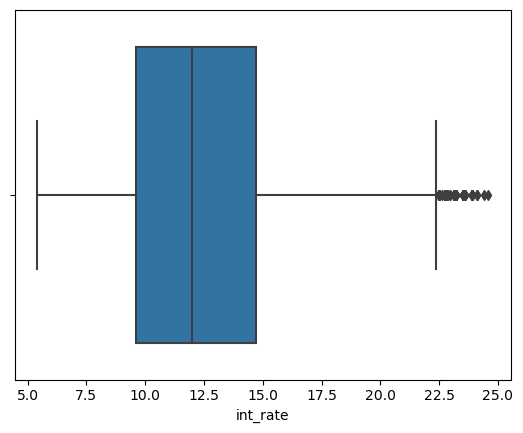

In [71]:
sns.boxplot(x=df_default_loan['int_rate']) #find outliers with box plot

In [72]:
from scipy import stats
z = np.abs(stats.zscore(df_default_loan['int_rate']))
arr_z=np.where(z>3)  #threshold 3 - get all row indices with value greather than 3
arr_np=np.asarray(arr_z)
print(arr_np)   #convert the indces into array

[[  215   685  1063  1472  1634  1884  2371  2504  2549  2729  2738  3300
   3807  4200  4401  4742  5236  5364  5800  6705  6717  9019  9679 12535
  12541 13604 14397]]


In [73]:
df_default_loan.drop(df_default_loan.index[arr_np[0]],inplace=True) #drop rows with greater threshold

In [74]:
print(df_default_loan.shape)

(39455, 19)


In [75]:
print(df_default_loan.head(10)) #print top 10 rows after cleaning and processing

    loan_amnt  term  int_rate  installment  grade  emp_length  home_ownership  \
0      5000.0     0     10.65       162.87      1           1               3   
1      2500.0     1     15.27        59.83      2          10               3   
2      2400.0     0     15.96        84.33      2           1               3   
3     10000.0     0     13.49       339.31      2           1               3   
5      5000.0     0      7.90       156.46      0           3               3   
6      7000.0     1     15.96       170.08      2           8               3   
7      3000.0     0     18.64       109.43      4           9               3   
8      5600.0     1     21.28       152.39      5           4               2   
9      5375.0     1     12.69       121.45      1          10               3   
10     6500.0     1     14.65       153.45      2           5               2   

    annual_inc  verification_status  loan_status  purpose  addr_state    dti  \
0      24000.0              

# Exploratory Data Analysis

In [77]:
import plotly.express as pxpie

In [78]:
pxpie.pie(values=df_default_loan['loan_status'].value_counts(), 
             names=['Fully Paid','Charged Off'], 
             title='Loan Status').show()

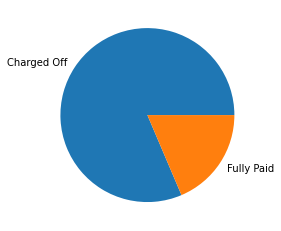

In [79]:
#pie plot to show loan status and count
arr=df_default_loan.loan_status.value_counts()
values=[arr[1],arr[0]]
names=["Charged Off","Fully Paid"]
plt.pie(values,labels=names)
plt.show()

In [80]:
df_default_loan.corr()

loan_amnt      term  int_rate  installment     grade  \
loan_amnt              1.000000  0.346061  0.286602     0.929771  0.259976   
term                   0.346061  1.000000  0.426919     0.085016  0.401856   
int_rate               0.286602  0.426919  1.000000     0.265110  0.946290   
installment            0.929771  0.085016  0.265110     1.000000  0.241523   
grade                  0.259976  0.401856  0.946290     0.241523  1.000000   
emp_length            -0.054627 -0.033649 -0.009273    -0.045689 -0.006783   
home_ownership        -0.173974 -0.101510  0.061051    -0.138485  0.047880   
annual_inc             0.273259  0.041310  0.050868     0.274786  0.052667   
verification_status    0.414641  0.242287  0.193853     0.362795  0.178039   
loan_status           -0.020841 -0.113691 -0.247603    -0.007663 -0.265611   
purpose               -0.124939 -0.033224 -0.002865    -0.127428  0.004718   
addr_state            -0.002555  0.008228  0.002198    -0.005048  0.001019   
dti                    0.059557  0.072687  0.111777     0.049922  0.103806   
open_acc               0.170980  0.043263  0.019896     0.168735  0.027711   
pub_rec               -0.048861  0.008210  0.103478    -0.043057  0.102981   
revol_bal              0.251935  0.028503  0.080471     0.261651  0.080918   
revol_util             0.060764  0.059950  0.451894     0.091322  0.427300   
total_acc              0.254008  0.090350 -0.035979     0.230300 -0.024953   
pub_rec_bankruptcies  -0.032799  0.015387  0.086558    -0.029582  0.086366   

                      emp_length  home_ownership  annual_inc  \
loan_amnt              -0.054627       -0.173974    0.273259   
term                   -0.033649       -0.101510    0.041310   
int_rate               -0.009273        0.061051    0.050868   
installment            -0.045689       -0.138485    0.274786   
grade                  -0.006783        0.047880    0.052667   
emp_length              1.000000        0.072671   -0.045971   
home_ownership          0.072671        1.000000   -0.199931   
annual_inc             -0.045971       -0.199931    1.000000   
verification_status    -0.030448       -0.076838    0.129877   
loan_status             0.002052       -0.005383    0.024042   
purpose                 0.007918        0.026913    0.002631   
addr_state             -0.006102       -0.042329   -0.008289   
dti                    -0.015837        0.018343   -0.121411   
open_acc               -0.038292       -0.207945    0.161644   
pub_rec                -0.010966       -0.032038   -0.013450   
revol_bal              -0.042390       -0.192153    0.274720   
revol_util              0.001361        0.073759    0.020323   
total_acc              -0.073184       -0.331536    0.242336   
pub_rec_bankruptcies   -0.015209       -0.035813   -0.011841   

                      verification_status  loan_status   purpose  addr_state  \
loan_amnt                        0.414641    -0.020841 -0.124939   -0.002555   
term                             0.242287    -0.113691 -0.033224    0.008228   
int_rate                         0.193853    -0.247603 -0.002865    0.002198   
installment                      0.362795    -0.007663 -0.127428   -0.005048   
grade                            0.178039    -0.265611  0.004718    0.001019   
emp_length                      -0.030448     0.002052  0.007918   -0.006102   
home_ownership                  -0.076838    -0.005383  0.026913   -0.042329   
annual_inc                       0.129877     0.024042  0.002631   -0.008289   
verification_status              1.000000    -0.021924 -0.031835   -0.010453   
loan_status                     -0.021924     1.000000 -0.049362    0.010956   
purpose                         -0.031835    -0.049362  1.000000    0.005579   
addr_state                      -0.010453     0.010956  0.005579    1.000000   
dti                              0.062403    -0.055345 -0.138878    0.020186   
open_acc                         0.084292    -0.021281 -0.09

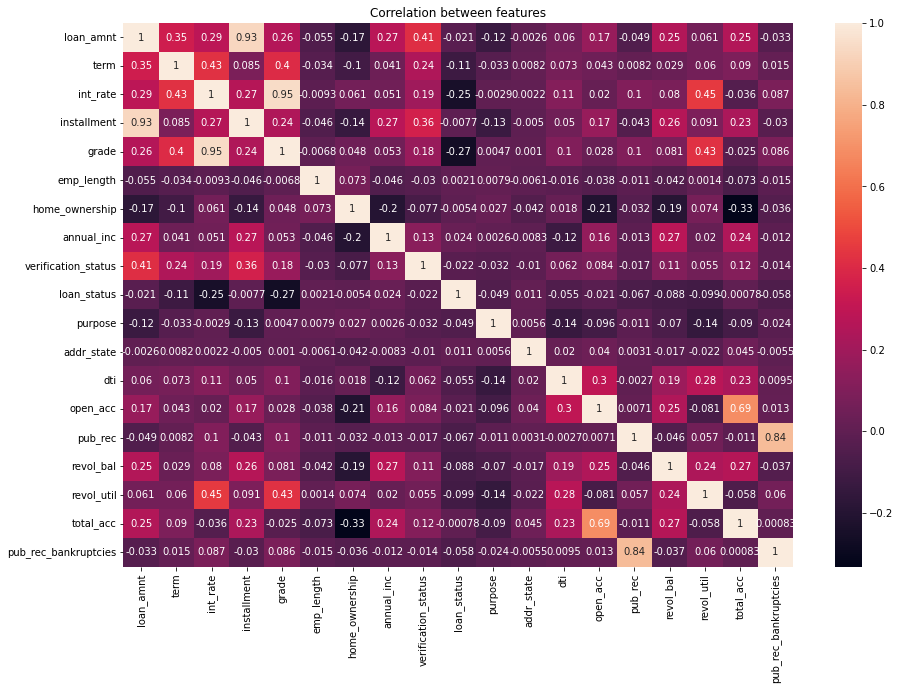

In [81]:
plt.figure(figsize=(15,10))
sns.heatmap(df_default_loan.corr(),annot=True).set(title="Correlation between features")
plt.show()

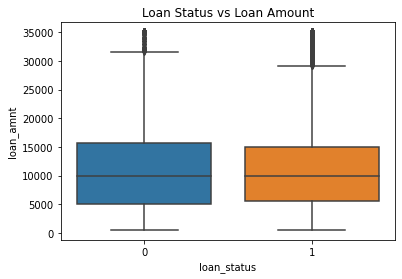

In [82]:
sns.boxplot(x=df_default_loan['loan_status'], y=df_default_loan['loan_amnt']).set(title="Loan Status vs Loan Amount")
plt.show()

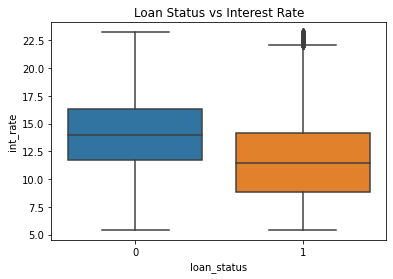

In [83]:
sns.boxplot(x=df_default_loan['loan_status'], y=df_default_loan['int_rate']).set(title="Loan Status vs Interest Rate")
plt.show()

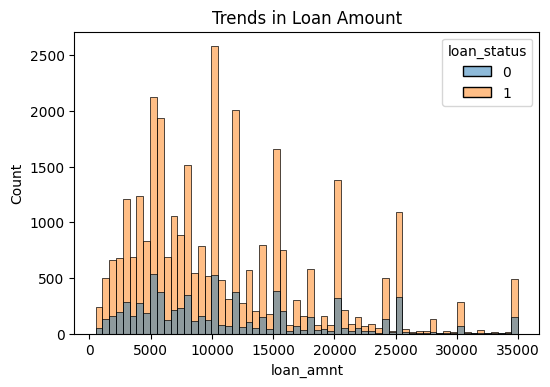

In [84]:
plt.figure(dpi = 100)
sns.histplot(x = df_default_loan['loan_amnt'], color = 'lightblue', edgecolor = 'black',hue='loan_status',data=df_default_loan).set(title="Trends in Loan Amount")
plt.show()

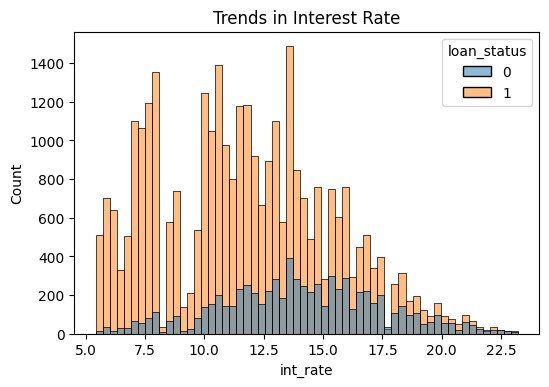

In [85]:
plt.figure(dpi = 100)
sns.histplot(x = df_default_loan['int_rate'], color = '', edgecolor = 'black',hue='loan_status',data=df_default_loan).set(title="Trends in Interest Rate")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

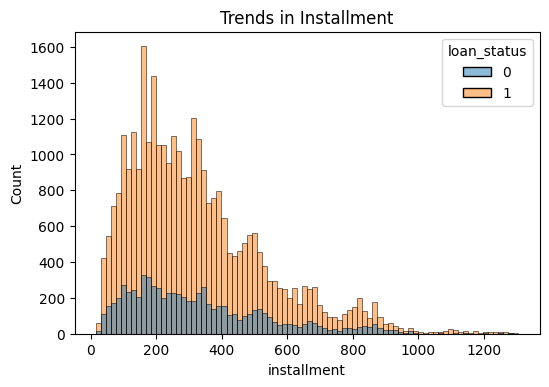

In [86]:
plt.figure(dpi = 100)
sns.histplot(x = df_default_loan['installment'], color = 'lightblue', edgecolor = 'black',hue='loan_status',data=df_default_loan).set(title="Trends in Installment")
plt.show

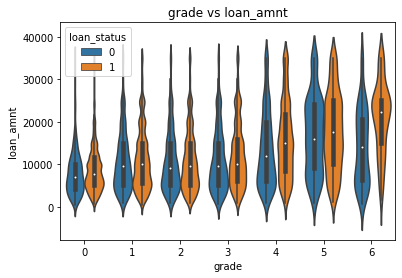

In [ ]:
vp = sns.violinplot(x="grade", y="loan_amnt", hue="loan_status",data=df_default_loan)
vp.set(title='grade vs loan_amnt')
plt.show()

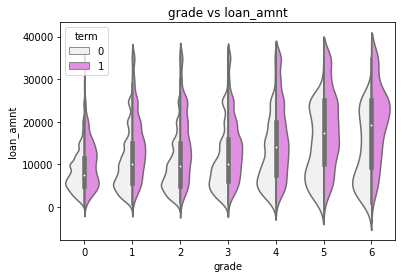

In [ ]:
vp = sns.violinplot(x="grade", y="loan_amnt", data=df_default_loan,hue='term',color='violet',split=True)
vp.set(title='grade vs loan_amnt')
plt.show()

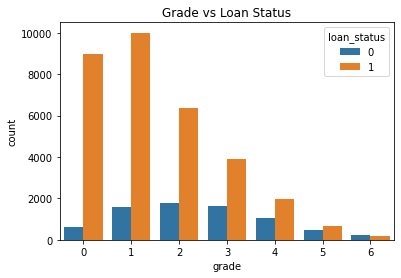

In [ ]:
sns.countplot(x='grade',data=df_default_loan,hue='loan_status').set(title="Grade vs Loan Status")
plt.show()

In [ ]:
pxpie.pie(values=df_default_loan['purpose'].value_counts(), 
          names=df_default_loan['purpose'].value_counts().index,
             title='Purpose').show()

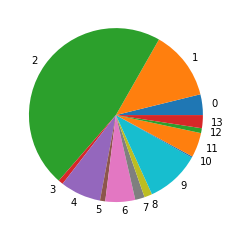

In [ ]:
#pie plot to show purpose and counts
arr=df_default_loan.purpose.value_counts()
values=[arr[0],arr[1],arr[2],arr[3],arr[4],arr[5],arr[6],arr[7],arr[8],arr[9],arr[10],arr[11],arr[12],arr[13]]
names=[0,1,2,3,4,5,6,7,8,9,10,11,12,13]
plt.pie(values,labels=names)
plt.show()

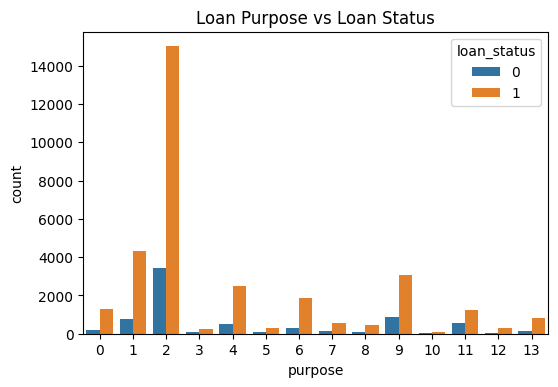

In [ ]:
plt.figure(dpi = 100)
sns.countplot(x='purpose',data=df_default_loan,hue='loan_status').set(title="Loan Purpose vs Loan Status")
plt.show()

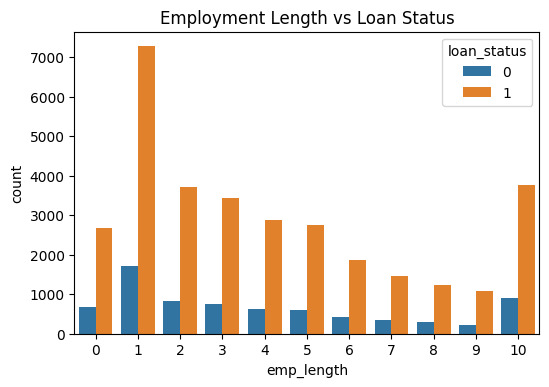

In [ ]:
plt.figure(dpi = 100)
sns.countplot(x='emp_length',data=df_default_loan,hue='loan_status').set(title="Employment Length vs Loan Status")
plt.show()

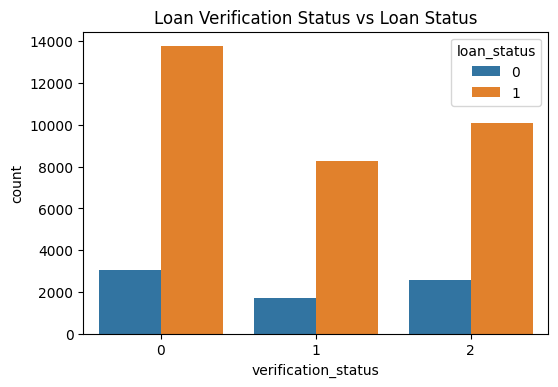

In [ ]:
plt.figure(dpi = 100)
sns.countplot(x='verification_status',data=df_default_loan,hue='loan_status').set(title="Loan Verification Status vs Loan Status")
plt.show()

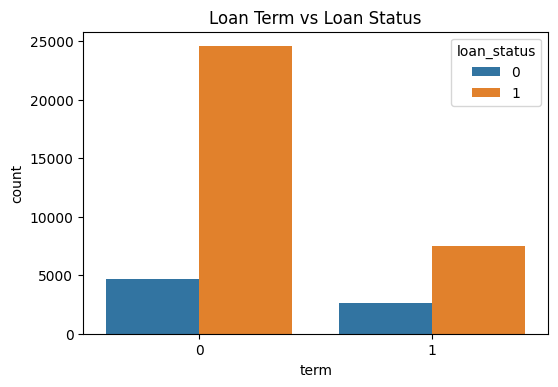

In [ ]:
plt.figure(dpi = 100)
sns.countplot(x='term',data=df_default_loan,hue='loan_status').set(title="Loan Term vs Loan Status")
plt.show()

[Text(0.5, 1.0, 'Home Ownership Status vs Loan Status')]

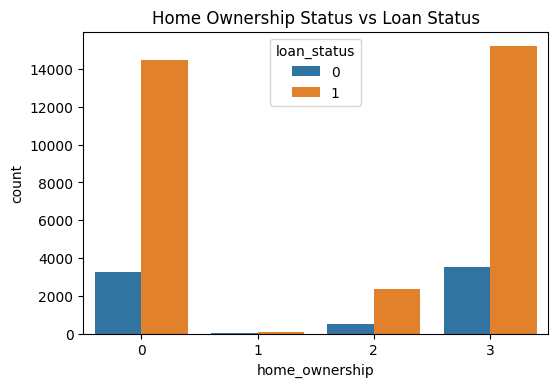

In [ ]:
plt.figure(dpi = 100)
sns.countplot(x='home_ownership',data=df_default_loan,hue='loan_status').set(title="Home Ownership Status vs Loan Status")

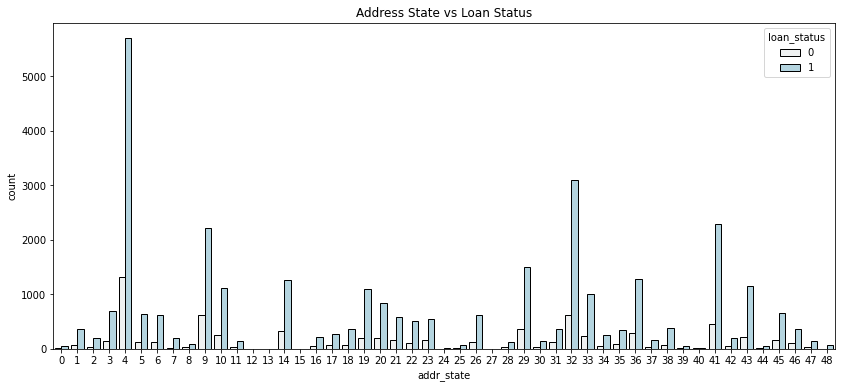

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.countplot(x = df_default_loan['addr_state'], color = 'lightblue', edgecolor = 'black',hue='loan_status',data=df_default_loan,ax=ax).set(title="Address State vs Loan Status")
plt.show()

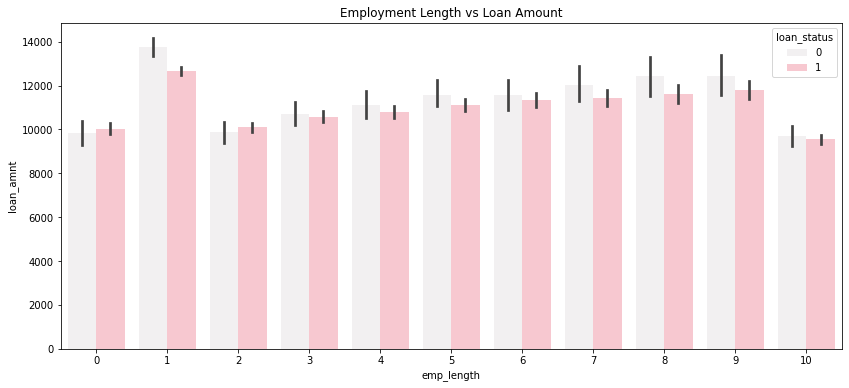

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.barplot(x=df_default_loan['emp_length'],y=df_default_loan['loan_amnt'],color='pink',hue=df_default_loan['loan_status'],ax=ax).set(title="Employment Length vs Loan Amount")
plt.show()

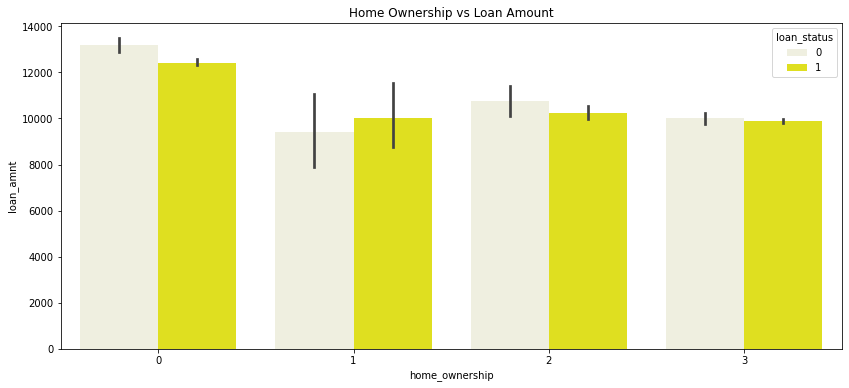

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
vp = sns.barplot(x="home_ownership", y="loan_amnt", data=df_default_loan,hue='loan_status',color='yellow',ax=ax).set(title="Home Ownership vs Loan Amount")
plt.show()

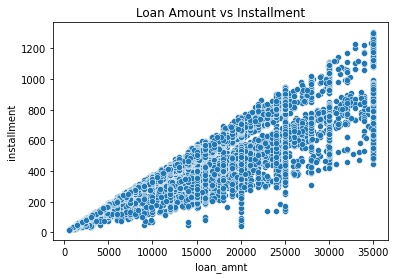

In [ ]:
sns.scatterplot(x=df_default_loan['loan_amnt'],y=df_default_loan['installment']).set(title="Loan Amount vs Installment")
plt.show()

[Text(0.5, 1.0, 'Employee Grade vs Interest Rate')]

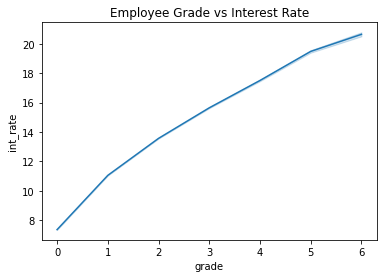

In [ ]:
sns.lineplot(x=df_default_loan['grade'],y=df_default_loan['int_rate']).set(title="Employee Grade vs Interest Rate")

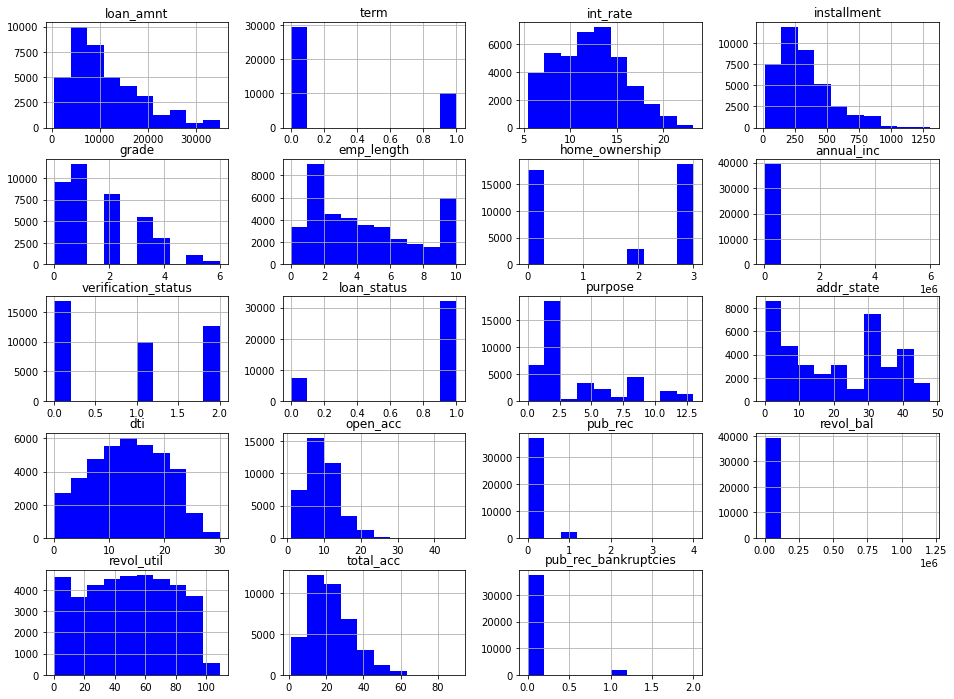

In [ ]:
df_default_loan.hist(bins=10,figsize=(16,12), color = 'Blue')
plt.show()

# MODELS

# DECISION TREE

In [76]:
df_default_loan_copy=df_default_loan.copy(deep=True)

In [77]:
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [78]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.30, random_state = 55,shuffle=True)

In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27618, 18)
(11837, 18)
(27618,)
(11837,)


In [81]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
test_predict=decision_tree.predict(x_test)
train_accuracy=decision_tree.score(x_train,y_train)
test_accuracy=decision_tree.score(x_test,y_test)
print ('Test accuracy',test_accuracy)
print ('Train accuracy',train_accuracy)

Test accuracy 0.7250147841513898
Train accuracy 1.0


[[ 649 1591]
 [1664 7933]]


<AxesSubplot:>

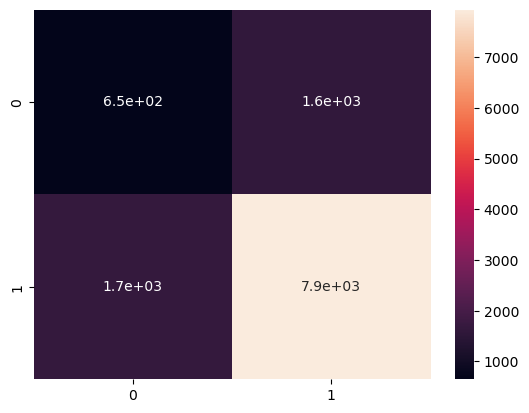

In [82]:
#print confusion matrix
confusion_matrix_decisiontree=metrics.confusion_matrix(y_test,test_predict)
print(confusion_matrix_decisiontree)
sns.heatmap(confusion_matrix_decisiontree,annot=True)

In [83]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.28      0.29      0.29      2240
           1       0.83      0.83      0.83      9597

    accuracy                           0.73     11837
   macro avg       0.56      0.56      0.56     11837
weighted avg       0.73      0.73      0.73     11837



[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


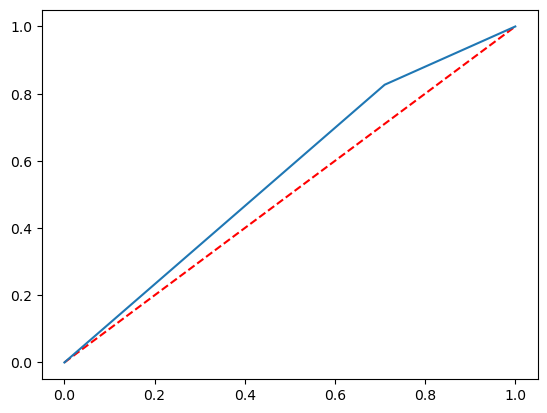

In [84]:
test_proba=decision_tree.predict_proba(x_test)
print(test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.show()

In [85]:
rocscore=roc_auc_score(y_test,test_proba[:,1])
print('Roc-Auc Score',rocscore)

Roc-Auc Score 0.5581723129623841


## Decision Tree HyperTuning

In [86]:
#find best params
decision_tree_hp=DecisionTreeClassifier()
hypertune_params=({'max_depth': np.arange(1,25) ,'criterion':['gini','entropy'],'splitter':['best', 'random']})
grid_search=GridSearchCV(decision_tree_hp , param_grid=hypertune_params , scoring='roc_auc')
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}


In [87]:
decision_tree_hp=DecisionTreeClassifier(max_depth=6,criterion='gini',random_state=10,splitter='best')
decision_tree_hp.fit(x_train,y_train)
test_predict=decision_tree_hp.predict(x_test)
train_accuracy=decision_tree_hp.score(x_train,y_train)
test_accuracy=decision_tree_hp.score(x_test,y_test)
print ('Test accuracy',test_accuracy)
print ('Train accuracy',train_accuracy)

Test accuracy 0.814902424600828
Train accuracy 0.8263089289593744


[[ 218 2022]
 [ 169 9428]]


<AxesSubplot:>

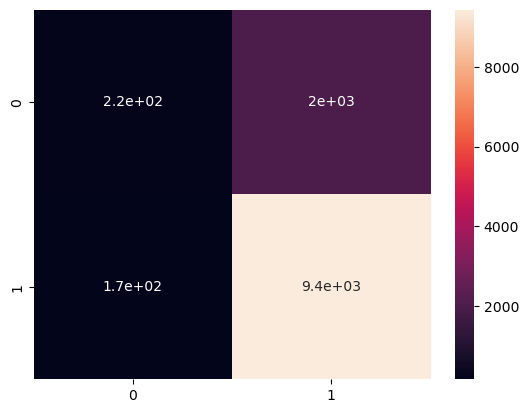

In [88]:
confusion_matrix_decisiontree=metrics.confusion_matrix(y_test,test_predict)
print(confusion_matrix_decisiontree)
sns.heatmap(confusion_matrix_decisiontree,annot=True)

In [89]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.56      0.10      0.17      2240
           1       0.82      0.98      0.90      9597

    accuracy                           0.81     11837
   macro avg       0.69      0.54      0.53     11837
weighted avg       0.77      0.81      0.76     11837



[[0.10125786 0.89874214]
 [0.23870637 0.76129363]
 [0.28450322 0.71549678]
 ...
 [0.02030948 0.97969052]
 [0.18783784 0.81216216]
 [0.23870637 0.76129363]]


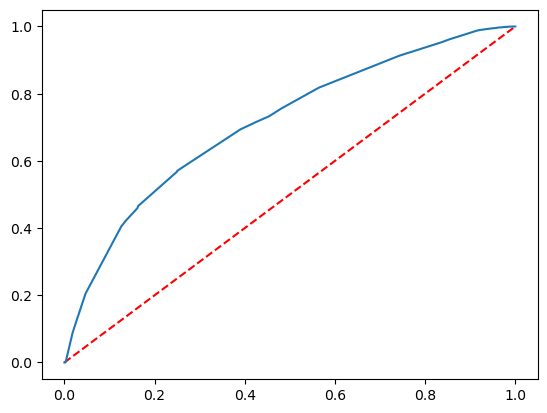

In [90]:
test_proba=decision_tree_hp.predict_proba(x_test)
print(test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.show()

In [91]:
rocscore=roc_auc_score(y_test,test_proba[:,1])
print('Roc-Auc Score',rocscore)

Roc-Auc Score 0.7124687402313223


In [93]:
import pickle

pickle.dump(decision_tree_hp,open('decision_tree.pkl','wb'))

# LOGISTIC REGRESSION

In [152]:
# reset data
df_default_loan_copy=df_default_loan.copy(deep=True)

In [153]:
# min max normalization
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [155]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

55% training data, 45% test data

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 55,shuffle=True)

In [157]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21700, 18)
(17755, 18)
(21700,)
(17755,)


In [158]:
logistic_reg=LogisticRegression(max_iter=10000,
                                solver='saga',
                                random_state=1234,C=10000,
                                penalty='l2',fit_intercept=True,intercept_scaling=1)
logistic_reg.fit(x_train,y_train)
test_score=logistic_reg.score(x_test,y_test)
print("Test Accuracy",test_score)
train_score=logistic_reg.score(x_train,y_train)
print("Train Accuracy",train_score)

Test Accuracy 0.8094621233455365
Train Accuracy 0.817926267281106


In [159]:
logistic_reg=LogisticRegression(max_iter=1000,
                                solver='lbfgs',
                                random_state=1234,C=10000,
                                penalty='l2',fit_intercept=True,intercept_scaling=1)
logistic_reg.fit(x_train,y_train)
test_score=logistic_reg.score(x_test,y_test)
print("Test Accuracy",test_score)
train_score=logistic_reg.score(x_train,y_train)
print("Train Accuracy",train_score)

Test Accuracy 0.8094621233455365
Train Accuracy 0.8172350230414747


In [161]:
test_predict_logistic=logistic_reg.predict(x_test)
print("Test Predict",test_predict_logistic)

Test Predict [1 1 1 ... 1 1 1]


[[   30  3353]
 [   30 14342]]


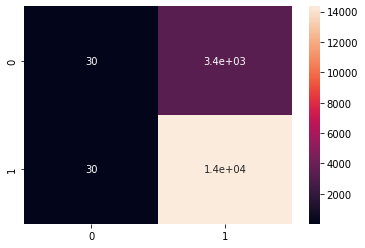

In [164]:
confusion_matrix_logistic=metrics.confusion_matrix(y_test,test_predict_logistic)
print(confusion_matrix_logistic)
sns.heatmap(confusion_matrix_logistic,annot=True)
plt.show()

In [165]:
print(classification_report(y_test,test_predict_logistic))

              precision    recall  f1-score   support

           0       0.50      0.01      0.02      3383
           1       0.81      1.00      0.89     14372

    accuracy                           0.81     17755
   macro avg       0.66      0.50      0.46     17755
weighted avg       0.75      0.81      0.73     17755



In [166]:
true_positive=confusion_matrix_logistic[1,1] #predicted positive actual positive
true_negative=confusion_matrix_logistic[0,0] #predicted negative actual negative
false_positive=confusion_matrix_logistic[0,1] #predicted positive actual negative
false_negative=confusion_matrix_logistic[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.008867868755542418
Sensitivity 0.9979126078485945


Text(0, 0.5, 'True Positive Rate')

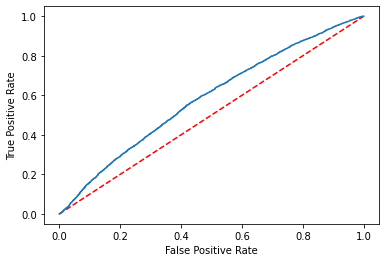

In [167]:
test_proba=logistic_reg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [168]:
print('Roc Auc Score',roc_auc_score(y_test,test_proba[:,1]))

Roc Auc Score 0.5843250691334243


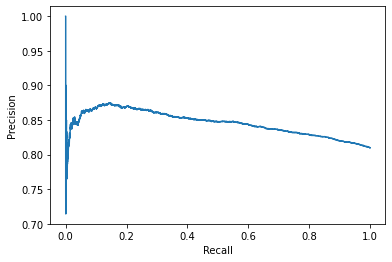

In [169]:
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

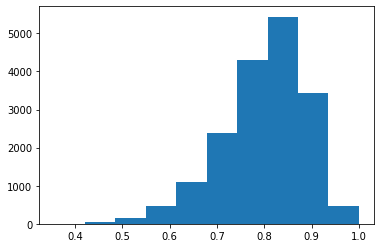

In [170]:
plt.hist(test_proba[:,1])
plt.show()

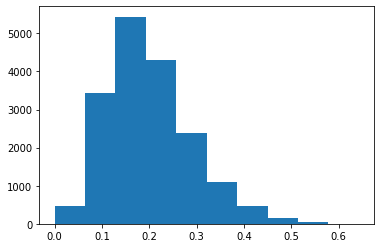

In [171]:
plt.hist(test_proba[:,0])
plt.show()

## Logistic Regression - Oversampling

In [187]:
# generate samples for loan_status =0
oversample = df_default_loan[df_default_loan['loan_status'] == 0].sample(15000, replace=True)
df_oversample = pd.concat([oversample, df_default_loan[df_default_loan['loan_status'] == 1]], axis=0)
print("value counts after oversampling",df_oversample['loan_status'].value_counts())

value counts after oversampling 1    32121
0    15000
Name: loan_status, dtype: int64


In [188]:
df_default_loan_copy=df_oversample.copy(deep=True)

In [189]:
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [190]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 55,shuffle=True)

In [192]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(37696, 18)
(9425, 18)
(37696,)
(9425,)


In [193]:
logistic_reg=LogisticRegression(max_iter=1000,
                                solver='lbfgs',
                                random_state=1234,C=10000,
                                penalty='l2',fit_intercept=True,intercept_scaling=1)
logistic_reg.fit(x_train,y_train)
test_score=logistic_reg.score(x_test,y_test)
print("Test Accuracy",test_score)
train_score=logistic_reg.score(x_train,y_train)
print("Train Accuracy",train_score)

Test Accuracy 0.676498673740053
Train Accuracy 0.6840513582342954


In [194]:
test_predict_logistic=logistic_reg.predict(x_test)

[[ 578 2489]
 [ 560 5798]]


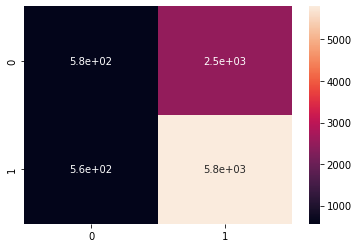

In [195]:
confusion_matrix_logistic=metrics.confusion_matrix(y_test,test_predict_logistic)
print(confusion_matrix_logistic)
sns.heatmap(confusion_matrix_logistic,annot=True)
plt.show()

In [200]:
print(classification_report(y_test,test_predict_logistic))

              precision    recall  f1-score   support

           0       0.51      0.19      0.27      3067
           1       0.70      0.91      0.79      6358

    accuracy                           0.68      9425
   macro avg       0.60      0.55      0.53      9425
weighted avg       0.64      0.68      0.62      9425



In [197]:
true_positive=confusion_matrix_logistic[1,1] #predicted positive actual positive
true_negative=confusion_matrix_logistic[0,0] #predicted negative actual negative
false_positive=confusion_matrix_logistic[0,1] #predicted positive actual negative
false_negative=confusion_matrix_logistic[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.18845777632865993
Sensitivity 0.9119219880465556


Text(0, 0.5, 'True Positive Rate')

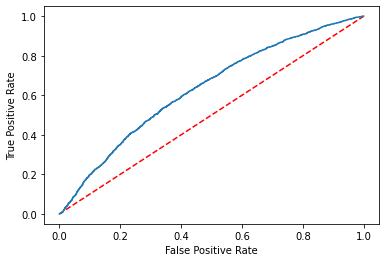

In [198]:
test_proba=logistic_reg.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [202]:
roc_auc_score(y_test,test_proba[:,1])

0.6316286073231027

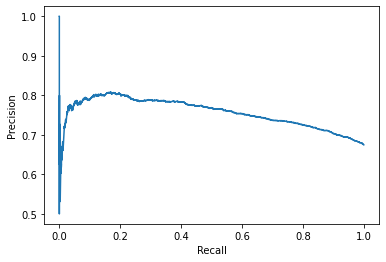

In [201]:
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# NAIVE BAYES

In [ ]:
# reset
df_default_loan_copy=df_default_loan.copy(deep=True)

In [ ]:
#min max normalization
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [ ]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 55,shuffle=True)

In [ ]:
class NaiveBayes:
    def __init__(self):
        self.naive_bayes=GaussianNB()
    def fit(self,x_train,y_train):
        self.naive_bayes.fit(x_train,y_train)
    def predict(self,x_test):
        return self.naive_bayes.predict(x_test)
    def score(self,x_test,y_test):
        return self.naive_bayes.score(x_test,y_test)
    def predict_proba(self,x_test):
        return self.naive_bayes.predict_proba(x_test)
        
        

In [ ]:
naive_bayes=NaiveBayes()
naive_bayes.fit(x_train,y_train)
test_predict_naive_bayes=naive_bayes.predict(x_test)
print(naive_bayes.score(x_test,y_test))

0.792114897212053


In [ ]:
confusion_matrix_naive_bayes=metrics.confusion_matrix(y_test,test_predict_naive_bayes)
print(confusion_matrix_naive_bayes)

[[  428  2955]
 [  736 13636]]


<AxesSubplot:>

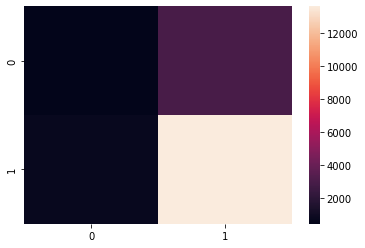

In [ ]:
sns.heatmap(confusion_matrix_naive_bayes)

In [ ]:
print(classification_report(y_test,test_predict_naive_bayes))

              precision    recall  f1-score   support

           0       0.37      0.13      0.19      3383
           1       0.82      0.95      0.88     14372

    accuracy                           0.79     17755
   macro avg       0.59      0.54      0.53     17755
weighted avg       0.74      0.79      0.75     17755



In [ ]:
true_positive=confusion_matrix_naive_bayes[1,1] #predicted positive actual positive
true_negative=confusion_matrix_naive_bayes[0,0] #predicted negative actual negative
false_positive=confusion_matrix_naive_bayes[0,1] #predicted positive actual negative
false_negative=confusion_matrix_naive_bayes[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.12651492757907182
Sensitivity 0.9487893125521848


In [ ]:
test_proba=naive_bayes.predict_proba(x_test)
print(test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
print(thresholds)

[[0.15001191 0.84998809]
 [0.28105337 0.71894663]
 [0.24260406 0.75739594]
 ...
 [0.0666217  0.9333783 ]
 [0.28045633 0.71954367]
 [0.0984133  0.9015867 ]]
[1.98662119e+000 9.86621192e-001 9.81886838e-001 ... 3.37658207e-013
 5.71277633e-015 5.78365167e-273]


Text(0, 0.5, 'True Positive Rate')

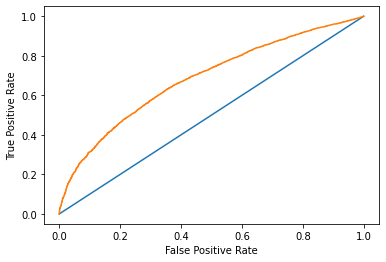

In [ ]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
print(test_proba)
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
print(thresholds)

[[0.15001191 0.84998809]
 [0.28105337 0.71894663]
 [0.24260406 0.75739594]
 ...
 [0.0666217  0.9333783 ]
 [0.28045633 0.71954367]
 [0.0984133  0.9015867 ]]
[5.78365167e-273 8.58700371e-113 1.19793621e-024 ... 9.86276859e-001
 9.86547841e-001 9.86621192e-001]


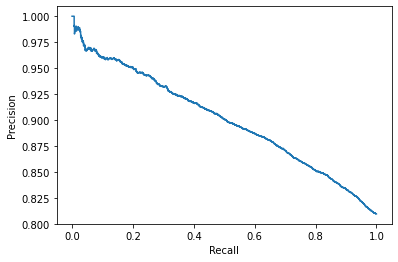

In [ ]:
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
roc_auc_score(y_test,test_proba[:,1])

0.6853272477217212

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 55,shuffle=True)

In [ ]:
naive_bayes=NaiveBayes()
naive_bayes.fit(x_train,y_train)
test_predict_naive_bayes=naive_bayes.predict(x_test)
print(naive_bayes.score(x_test,y_test))

0.784818147256368


In [ ]:
confusion_matrix_naive_bayes=metrics.confusion_matrix(y_test,test_predict_naive_bayes)
print(confusion_matrix_naive_bayes)

[[ 214 1308]
 [ 390 5979]]


<AxesSubplot:>

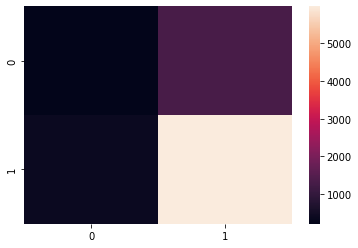

In [ ]:
sns.heatmap(confusion_matrix_naive_bayes)

In [ ]:
print(classification_report(y_test,test_predict_naive_bayes))

              precision    recall  f1-score   support

           0       0.35      0.14      0.20      1522
           1       0.82      0.94      0.88      6369

    accuracy                           0.78      7891
   macro avg       0.59      0.54      0.54      7891
weighted avg       0.73      0.78      0.75      7891



In [ ]:
true_positive=confusion_matrix_naive_bayes[1,1] #predicted positive actual positive
true_negative=confusion_matrix_naive_bayes[0,0] #predicted negative actual negative
false_positive=confusion_matrix_naive_bayes[0,1] #predicted positive actual negative
false_negative=confusion_matrix_naive_bayes[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.14060446780551905
Sensitivity 0.9387658973151202


In [ ]:
test_proba=naive_bayes.predict_proba(x_test)
print(test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
print(thresholds)

[[0.17110721 0.82889279]
 [0.27669409 0.72330591]
 [0.25479195 0.74520805]
 ...
 [0.26905366 0.73094634]
 [0.20808664 0.79191336]
 [0.25720814 0.74279186]]
[1.98776787e+00 9.87767874e-01 9.83484833e-01 ... 1.87547577e-06
 4.10025592e-07 0.00000000e+00]


Text(0, 0.5, 'True Positive Rate')

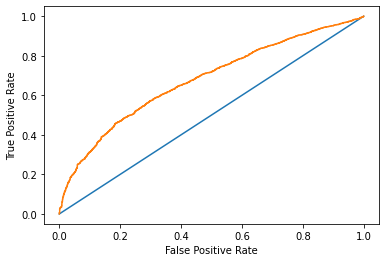

In [ ]:
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
print(test_proba)
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
print(thresholds)

[[0.17110721 0.82889279]
 [0.27669409 0.72330591]
 [0.25479195 0.74520805]
 ...
 [0.26905366 0.73094634]
 [0.20808664 0.79191336]
 [0.25720814 0.74279186]]
[0.00000000e+000 5.32525301e-247 2.17383271e-055 ... 9.86775375e-001
 9.87168482e-001 9.87767874e-001]


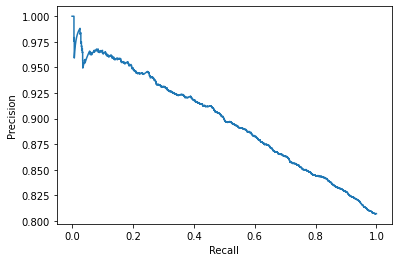

In [ ]:
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

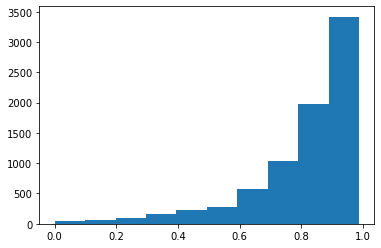

In [ ]:
plt.hist(test_proba[:,1])
plt.show()

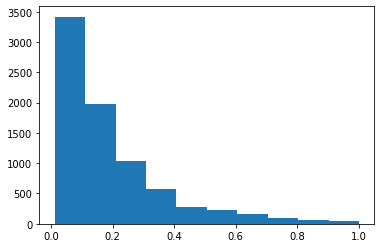

In [ ]:
plt.hist(test_proba[:,0])
plt.show()

In [ ]:
roc_auc_score(y_test,test_proba[:,1])

0.6782576949081344

## Naive Bayes HyperTuning

In [205]:
naive_bayes=GaussianNB()
hypertune_params=({'var_smoothing': np.logspace(0,-9, num=1000)})
grid_search=GridSearchCV(naive_bayes , param_grid=hypertune_params , scoring='roc_auc')
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'var_smoothing': 1e-09}


In [207]:
naive_bayes_hp=GaussianNB(var_smoothing=1e-09)
naive_bayes_hp.fit(x_train,y_train)
test_predict=naive_bayes_hp.predict(x_test)
train_accuracy=naive_bayes_hp.score(x_train,y_train)
test_accuracy=naive_bayes_hp.score(x_test,y_test)
print ('Test accuracy',test_accuracy)
print ('Train accuracy',train_accuracy)

Test accuracy 0.673209549071618
Train accuracy 0.6821413412563667


[[ 951 2116]
 [ 964 5394]]


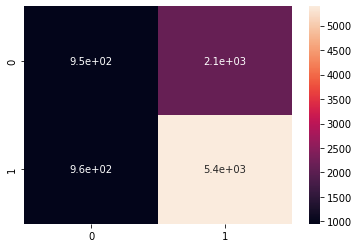

In [210]:
confusion_matrix_naivebayes=metrics.confusion_matrix(y_test,test_predict)
print(confusion_matrix_naivebayes)
sns.heatmap(confusion_matrix_naivebayes,annot=True)
plt.show()

In [209]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.50      0.31      0.38      3067
           1       0.72      0.85      0.78      6358

    accuracy                           0.67      9425
   macro avg       0.61      0.58      0.58      9425
weighted avg       0.65      0.67      0.65      9425



In [211]:
true_positive=confusion_matrix_naivebayes[1,1] #predicted positive actual positive
true_negative=confusion_matrix_naivebayes[0,0] #predicted negative actual negative
false_positive=confusion_matrix_naivebayes[0,1] #predicted positive actual negative
false_negative=confusion_matrix_naivebayes[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.3100749918487121
Sensitivity 0.8483799937087134


Text(0, 0.5, 'True Positive Rate')

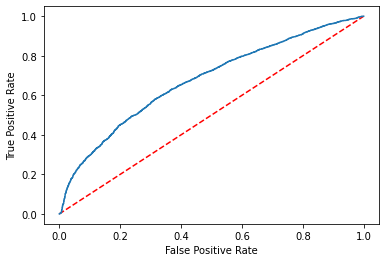

In [212]:
test_proba=naive_bayes_hp.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [213]:
roc_auc_score(y_test,test_proba[:,1])

0.6752368950418733

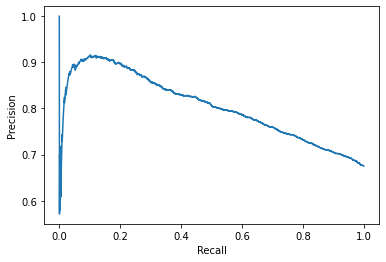

In [214]:
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# K NEAREST NEIGHBORS

In [ ]:
df_default_loan_copy=df_default_loan.copy(deep=True)

In [ ]:
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [ ]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.40, random_state = 55,shuffle=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23673, 18)
(15782, 18)
(23673,)
(15782,)


In [ ]:
# find accuracies fro k = 1to 25
scores=[]
for k in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test,y_test))

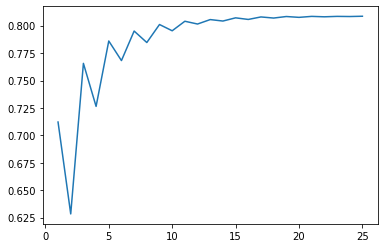

In [ ]:
r=range(1,26)
plt.plot(r,scores)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
knn_score=knn.score(x_test,y_test)
print(knn_score)

0.808769484222532


In [ ]:
test_predict=knn.predict(x_test)

In [ ]:
confusion_knn=metrics.confusion_matrix(y_test,test_predict)
print(confusion_knn)

[[    0  3018]
 [    0 12764]]


<AxesSubplot:>

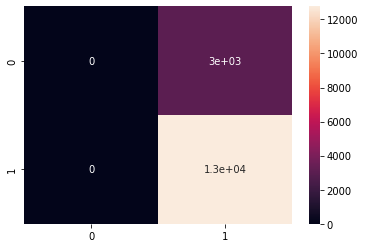

In [ ]:
sns.heatmap(confusion_knn,annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3018
           1       0.81      1.00      0.89     12764

    accuracy                           0.81     15782
   macro avg       0.40      0.50      0.45     15782
weighted avg       0.65      0.81      0.72     15782



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
test_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, test_proba)

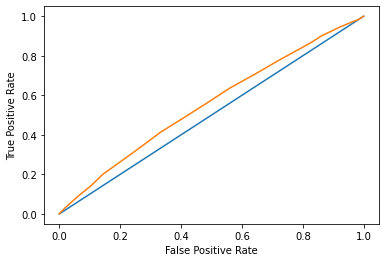

In [ ]:
plt.plot([0,1],[0,1],)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
print(test_proba)
precision, recall, thresholds = precision_recall_curve(y_test, test_proba)
print(thresholds)

[0.89 0.87 0.84 ... 0.82 0.89 0.8 ]
[0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91
 0.92 0.93 0.94 0.95 0.96]


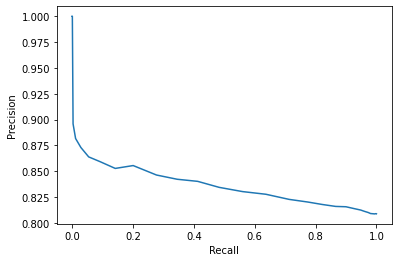

In [ ]:
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
roc_auc_score(y_test,test_proba)

0.5542607719399679

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 55,shuffle=True)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35509, 18)
(3946, 18)
(35509,)
(3946,)


In [ ]:
# find accuracies for k = 1 to 10
scores=[]
for k in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test,y_test))

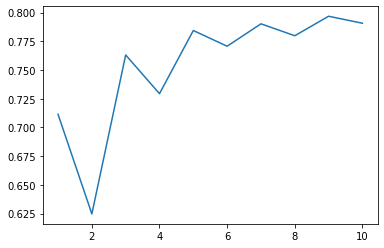

In [ ]:
r=range(1,11)
plt.plot(r,scores)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
knn.score(x_test,y_test)

0.8071464774455145

In [ ]:
test_predict=knn.predict(x_test)

<AxesSubplot:>

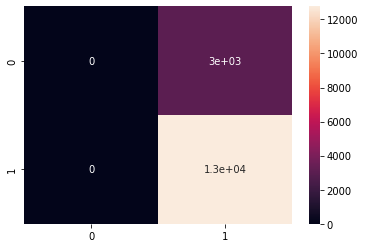

In [ ]:
sns.heatmap(confusion_knn,annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       761
           1       0.81      1.00      0.89      3185

    accuracy                           0.81      3946
   macro avg       0.40      0.50      0.45      3946
weighted avg       0.65      0.81      0.72      3946



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
test_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_proba)

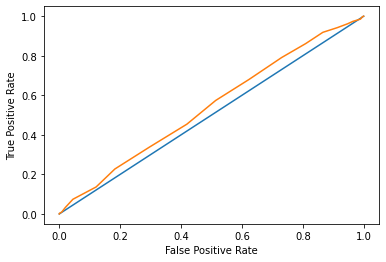

In [ ]:
plt.plot([0,1],[0,1],)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
print(test_proba)
precision, recall, thresholds = precision_recall_curve(y_test, test_proba)
print(thresholds)

[0.92 0.86 0.86 ... 0.86 0.86 0.9 ]
[0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86
 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


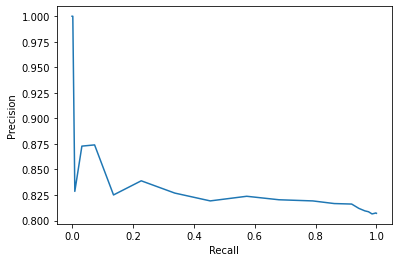

In [ ]:
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
roc_auc_score(y_test,test_proba)

0.5413563909340144

## KNN OVERSAMPLING

In [ ]:
oversample = df_default_loan[df_default_loan['loan_status'] == 0].sample(15000, replace=True)
df_oversample = pd.concat([oversample, df_default_loan[df_default_loan['loan_status'] == 1]], axis=0)
print("value counts after oversampling",df_oversample['loan_status'].value_counts())

value counts after oversampling 1    32121
0    15000
Name: loan_status, dtype: int64


In [ ]:
df_default_loan_copy=df_oversample.copy(deep=True)

In [ ]:
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [ ]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 55,shuffle=True)

In [ ]:
scores=[]
for k in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    pr=knn.predict(x_test)
    scores.append(knn.score(x_test,y_test))
    confusion_matrix=metrics.confusion_matrix(y_test,pr)
    print("confusion matrix for k=",k)
    print(confusion_matrix)

confusion matrix for k= 1
[[2597  470]
 [1071 5287]]
confusion matrix for k= 2
[[2680  387]
 [2029 4329]]
confusion matrix for k= 3
[[2014 1053]
 [1446 4912]]
confusion matrix for k= 4
[[2177  890]
 [2048 4310]]
confusion matrix for k= 5
[[1572 1495]
 [1359 4999]]
confusion matrix for k= 6
[[1774 1293]
 [1817 4541]]
confusion matrix for k= 7
[[1311 1756]
 [1247 5111]]
confusion matrix for k= 8
[[1530 1537]
 [1597 4761]]
confusion matrix for k= 9
[[1171 1896]
 [1118 5240]]
confusion matrix for k= 10
[[1348 1719]
 [1440 4918]]


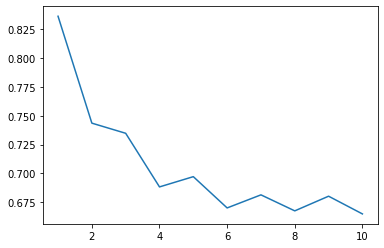

In [ ]:
r=range(1,11)
plt.plot(r,scores)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn_score=knn.score(x_test,y_test)
print(knn_score)

0.7436604774535809


In [ ]:
test_predict=knn.predict(x_test)

In [ ]:
confusion_knn=metrics.confusion_matrix(y_test,test_predict)
print(confusion_knn)

[[2680  387]
 [2029 4329]]


<AxesSubplot:>

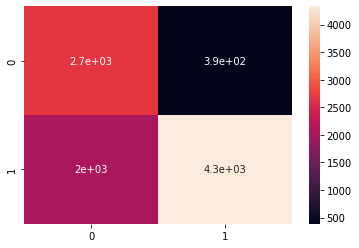

In [ ]:
sns.heatmap(confusion_knn,annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.57      0.87      0.69      3067
           1       0.92      0.68      0.78      6358

    accuracy                           0.74      9425
   macro avg       0.74      0.78      0.74      9425
weighted avg       0.80      0.74      0.75      9425



In [ ]:
true_positive=confusion_matrix_naive_bayes[1,1] #predicted positive actual positive
true_negative=confusion_matrix_naive_bayes[0,0] #predicted negative actual negative
false_positive=confusion_matrix_naive_bayes[0,1] #predicted positive actual negative
false_negative=confusion_matrix_naive_bayes[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.14060446780551905
Sensitivity 0.9387658973151202


In [ ]:
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

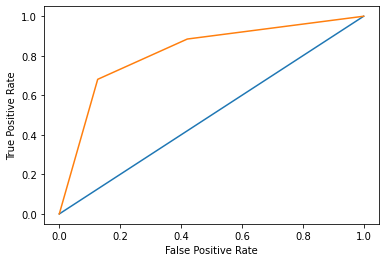

In [ ]:
plt.plot([0,1],[0,1],)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
print(y_pred_proba)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
print(thresholds)

[1.  1.  1.  ... 0.5 1.  0. ]
[0.  0.5 1. ]


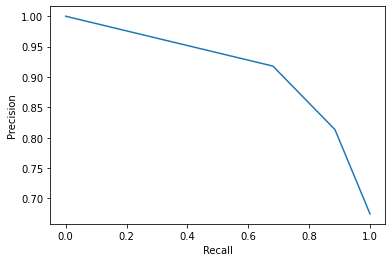

In [ ]:
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
roc_auc_score(y_test,y_pred_proba)

0.8194256139465947

# SUPPORT VECTOR MACHINES

In [ ]:
#reset
df_default_loan_copy=df_default_loan.copy(deep=True)

In [ ]:
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [ ]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.35, random_state = 55,shuffle=True)

In [ ]:
svm=LinearSVC(C=100,max_iter=1000000)
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.8089065894279508
score on train: 0.8171573406122051


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
test_predict=svm.predict(x_test)
confusion_svm=metrics.confusion_matrix(y_test,test_predict)
print(confusion_svm)

[[    4  2639]
 [    0 11167]]


<AxesSubplot:>

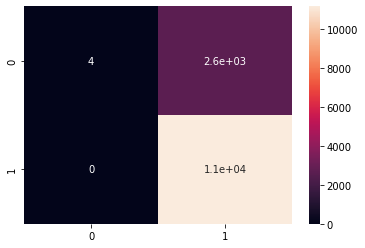

In [ ]:
sns.heatmap(confusion_svm,annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2643
           1       0.81      1.00      0.89     11167

    accuracy                           0.81     13810
   macro avg       0.90      0.50      0.45     13810
weighted avg       0.85      0.81      0.72     13810



In [ ]:
true_positive=confusion_svm[1,1] #predicted positive actual positive
true_negative=confusion_svm[0,0] #predicted negative actual negative
false_positive=confusion_svm[0,1] #predicted positive actual negative
false_negative=confusion_svm[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.001513431706394249
Sensitivity 1.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 55,shuffle=True)

In [ ]:
svm=LinearSVC(C=0.1,max_iter=100000,loss='hinge')
svm.probability=True
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.808160162189559
score on train: 0.8152581035793742


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
test_predict=svm.predict(x_test)
confusion_svm=metrics.confusion_matrix(y_test,test_predict)
print(confusion_svm)

[[   5  756]
 [   1 3184]]


<AxesSubplot:>

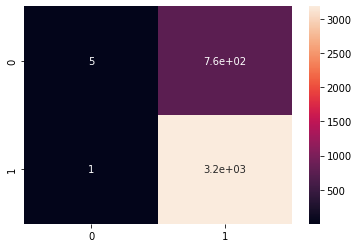

In [ ]:
sns.heatmap(confusion_svm,annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.83      0.01      0.01       761
           1       0.81      1.00      0.89      3185

    accuracy                           0.81      3946
   macro avg       0.82      0.50      0.45      3946
weighted avg       0.81      0.81      0.72      3946



In [ ]:
true_positive=confusion_svm[1,1] #predicted positive actual positive
true_negative=confusion_svm[0,0] #predicted negative actual negative
false_positive=confusion_svm[0,1] #predicted positive actual negative
false_negative=confusion_svm[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.006570302233902759
Sensitivity 0.9996860282574568


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.50, random_state = 55,shuffle=True)

In [ ]:
svm=LinearSVC(C=1000,max_iter=100000,class_weight='balanced')
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.19251824817518248
score on train: 0.18472144776195062


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
test_predict=svm.predict(x_test)
confusion_svm=metrics.confusion_matrix(y_test,test_predict)
print(confusion_svm)

[[ 3726    19]
 [15911    72]]


<AxesSubplot:>

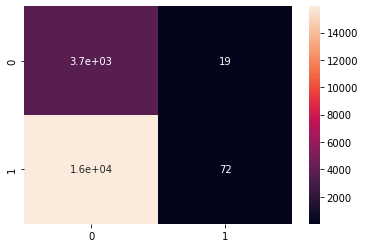

In [ ]:
sns.heatmap(confusion_svm,annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.19      0.99      0.32      3745
           1       0.79      0.00      0.01     15983

    accuracy                           0.19     19728
   macro avg       0.49      0.50      0.16     19728
weighted avg       0.68      0.19      0.07     19728



In [ ]:
true_positive=confusion_svm[1,1] #predicted positive actual positive
true_negative=confusion_svm[0,0] #predicted negative actual negative
false_positive=confusion_svm[0,1] #predicted positive actual negative
false_negative=confusion_svm[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.9949265687583445
Sensitivity 0.004504786335481449


## SVM- Oversampling and Undersampling

In [ ]:
# randomly select rows for both the classes
oversample = df_default_loan[df_default_loan['loan_status'] == 0].sample(15000, replace=True)
undersample = df_default_loan[df_default_loan['loan_status'] == 1].sample(20000, replace=True)
df_oversample = pd.concat([oversample, undersample], axis=0)
print("value counts after oversampling",df_oversample['loan_status'].value_counts())

value counts after oversampling 1    20000
0    15000
Name: loan_status, dtype: int64


In [ ]:
df_default_loan_copy=df_oversample.copy(deep=True)

In [ ]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.20, random_state = 55,shuffle=True)

In [ ]:
svm=LinearSVC(C=0.1,max_iter=100000)
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.5788571428571428
score on train: 0.5799285714285715


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
test_predict=svm.predict(x_test)
confusion_svm=metrics.confusion_matrix(y_test,test_predict)
print(confusion_svm)

[[ 119 2900]
 [  48 3933]]


<AxesSubplot:>

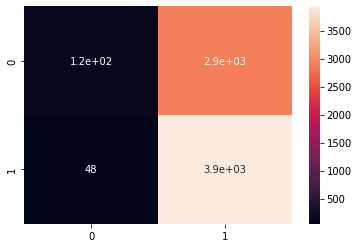

In [ ]:
sns.heatmap(confusion_svm,annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.71      0.04      0.07      3019
           1       0.58      0.99      0.73      3981

    accuracy                           0.58      7000
   macro avg       0.64      0.51      0.40      7000
weighted avg       0.63      0.58      0.45      7000



In [ ]:
true_positive=confusion_svm[1,1] #predicted positive actual positive
true_negative=confusion_svm[0,0] #predicted negative actual negative
false_positive=confusion_svm[0,1] #predicted positive actual negative
false_negative=confusion_svm[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.03941702550513415
Sensitivity 0.9879427279577996


## SVM- Oversampling

In [ ]:
# randomly select 15000 rows for loan_status==0
oversample = df_default_loan[df_default_loan['loan_status'] == 0].sample(15000, replace=True)
df_oversample = pd.concat([oversample, df_default_loan[df_default_loan['loan_status'] == 1]], axis=0)
print("value counts after oversampling",df_oversample['loan_status'].value_counts())

value counts after oversampling 1    32121
0    15000
Name: loan_status, dtype: int64


In [ ]:
df_default_loan_copy=df_oversample.copy(deep=True)

In [ ]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.30, random_state = 55,shuffle=True)

In [ ]:
svm=LinearSVC(C=10,max_iter=10000,loss='hinge')
svm.fit(x_train, y_train)
print("score on test: " + str(svm.score(x_test, y_test)))
print("score on train: "+ str(svm.score(x_train, y_train)))

score on test: 0.6522384892849565
score on train: 0.6504904734955669


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
test_predict=svm.predict(x_test)
confusion_svm=metrics.confusion_matrix(y_test,test_predict)
print(confusion_svm)

[[ 489 1049]
 [ 590 2585]]


<AxesSubplot:>

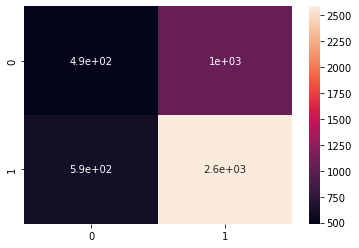

In [ ]:
sns.heatmap(confusion_svm,annot=True)

In [ ]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.45      0.32      0.37      1538
           1       0.71      0.81      0.76      3175

    accuracy                           0.65      4713
   macro avg       0.58      0.57      0.57      4713
weighted avg       0.63      0.65      0.63      4713



In [ ]:
true_positive=confusion_svm[1,1] #predicted positive actual positive
true_negative=confusion_svm[0,0] #predicted negative actual negative
false_positive=confusion_svm[0,1] #predicted positive actual negative
false_negative=confusion_svm[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.3179453836150845
Sensitivity 0.8141732283464567


## SVM- ROC AUC Curve

In [277]:
svm_roc = SGDClassifier(max_iter=10000,loss='hinge')
svm_calibrated = CalibratedClassifierCV(svm_roc, cv=5)
svm_calibrated.fit(x_train,y_train)
test_predict=svm_calibrated.predict(x_test)
train_accuracy=svm_calibrated.score(x_train,y_train)
test_accuracy=svm_calibrated.score(x_test,y_test)
print ('Test accuracy',test_accuracy)
print ('Train accuracy',train_accuracy)

Test accuracy 0.8071464774455145
Train accuracy 0.8148919992114675


[[ 951 2116]
 [ 964 5394]]


<AxesSubplot:>

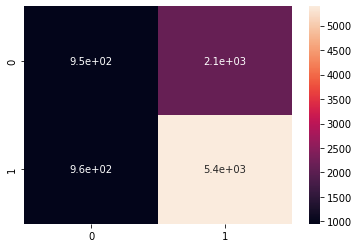

In [278]:
confusion_matrix_svm=metrics.confusion_matrix(y_test,test_predict)
print(confusion_matrix_decisiontree)
sns.heatmap(confusion_matrix_decisiontree,annot=True)

In [279]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       761
           1       0.81      1.00      0.89      3185

    accuracy                           0.81      3946
   macro avg       0.40      0.50      0.45      3946
weighted avg       0.65      0.81      0.72      3946



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



[[0.18519665 0.81480335]
 [0.18519665 0.81480335]
 [0.18519665 0.81480335]
 ...
 [0.18519665 0.81480335]
 [0.18519665 0.81480335]
 [0.18519665 0.81480335]]


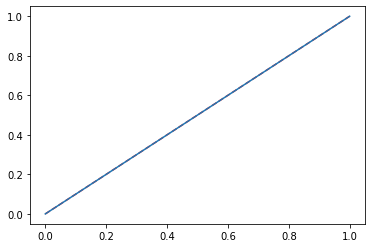

In [280]:
test_proba=svm_calibrated.predict_proba(x_test)
print(test_proba)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr)
plt.show()

In [281]:
rocscore=roc_auc_score(y_test,test_proba[:,1])
print('Roc-Auc Score',rocscore)

Roc-Auc Score 0.5


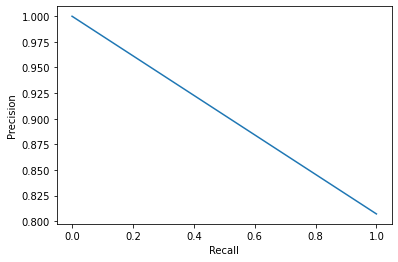

In [282]:
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# XGBOOST

In [215]:
#reset
df_default_loan_copy=df_default_loan.copy(deep=True)

In [216]:
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [217]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.40, random_state = 55,shuffle=True)

In [219]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23673, 18)
(15782, 18)
(23673,)
(15782,)


In [220]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", 
 random_state=42, 
 eval_metric="auc",
 eta=0.5,
 gamma=1)
xgb_classifier.fit(x_train,y_train)
test_predict=xgb_classifier.predict(x_test)
train_predict=xgb_classifier.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,train_predict))
print("Test Accuracy:",accuracy_score(y_test,test_predict))

Train Accuracy: 0.929159802306425
Test Accuracy: 0.8037637815232543


[[  512  2506]
 [  591 12173]]


<AxesSubplot:>

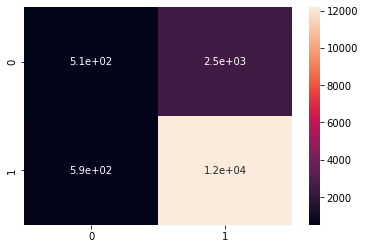

In [221]:
confusion_xgb=metrics.confusion_matrix(y_test,test_predict)
print(confusion_xgb)
sns.heatmap(confusion_xgb,annot=True)

In [222]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.46      0.17      0.25      3018
           1       0.83      0.95      0.89     12764

    accuracy                           0.80     15782
   macro avg       0.65      0.56      0.57     15782
weighted avg       0.76      0.80      0.77     15782



In [223]:
true_positive=confusion_xgb[1,1] #predicted positive actual positive
true_negative=confusion_xgb[0,0] #predicted negative actual negative
false_positive=confusion_xgb[0,1] #predicted positive actual negative
false_negative=confusion_xgb[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.16964877402253148
Sensitivity 0.9536979003447196


Text(0, 0.5, 'True Positive Rate')

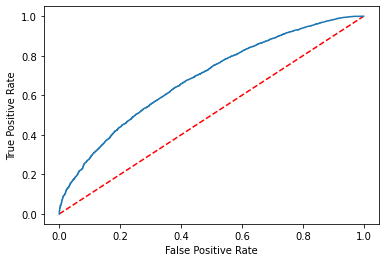

In [224]:
test_proba=xgb_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [225]:
roc_auc_score(y_test,test_proba[:,1])

0.6854569984252015

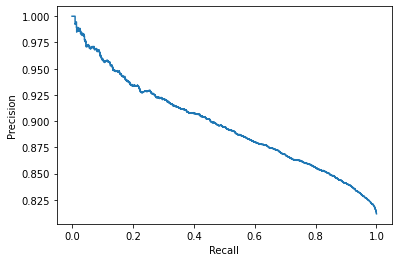

In [226]:
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [227]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", 
 random_state=1234, 
 eval_metric="auc",
 eta=1e-7,
 gamma=1e-5,
scale_pos_weight=200)
xgb_classifier.fit(x_train,y_train)
test_predict=xgb_classifier.predict(x_test)
train_predict=xgb_classifier.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,train_predict))
print("Test Accuracy:",accuracy_score(y_test,test_predict))

Train Accuracy: 0.8215266337177375
Test Accuracy: 0.8125079204156634


[[   59  2959]
 [    0 12764]]


<AxesSubplot:>

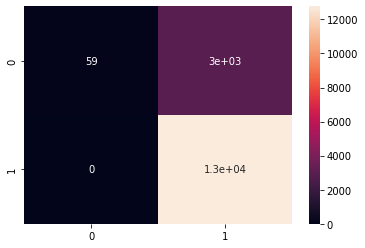

In [228]:
confusion_xgb=metrics.confusion_matrix(y_test,test_predict)
print(confusion_xgb)
sns.heatmap(confusion_xgb,annot=True)

In [229]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      3018
           1       0.81      1.00      0.90     12764

    accuracy                           0.81     15782
   macro avg       0.91      0.51      0.47     15782
weighted avg       0.85      0.81      0.73     15782



In [230]:
true_positive=confusion_xgb[1,1] #predicted positive actual positive
true_negative=confusion_xgb[0,0] #predicted negative actual negative
false_positive=confusion_xgb[0,1] #predicted positive actual negative
false_negative=confusion_xgb[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.01954937044400265
Sensitivity 1.0


Text(0, 0.5, 'True Positive Rate')

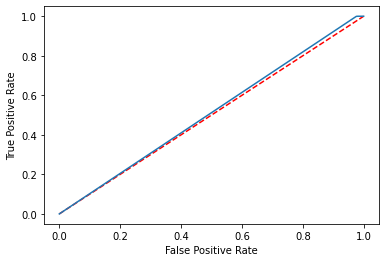

In [231]:
test_proba=xgb_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [232]:
roc_auc_score(y_test,test_proba[:,1])

0.5117868470779834

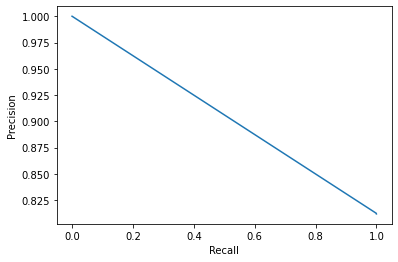

In [233]:
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [238]:
xgb_classifier = xgb.XGBClassifier(objective="binary:hinge", 
 random_state=42, 
 eval_metric="rmse",
 eta=1e-7,
 gamma=1e-5)
xgb_classifier.fit(x_train,y_train)
test_predict=xgb_classifier.predict(x_test)
train_predict=xgb_classifier.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,train_predict))
print("Test Accuracy:",accuracy_score(y_test,test_predict))

Train Accuracy: 0.8176825919824272
Test Accuracy: 0.808769484222532


[[    0  3018]
 [    0 12764]]


<AxesSubplot:>

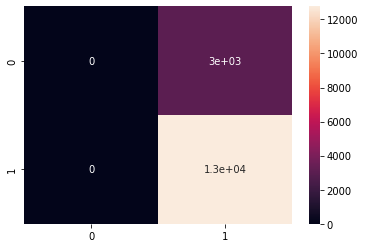

In [239]:
confusion_xgb=metrics.confusion_matrix(y_test,test_predict)
print(confusion_xgb)
sns.heatmap(confusion_xgb,annot=True)

In [240]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3018
           1       0.81      1.00      0.89     12764

    accuracy                           0.81     15782
   macro avg       0.40      0.50      0.45     15782
weighted avg       0.65      0.81      0.72     15782



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [241]:
true_positive=confusion_xgb[1,1] #predicted positive actual positive
true_negative=confusion_xgb[0,0] #predicted negative actual negative
false_positive=confusion_xgb[0,1] #predicted positive actual negative
false_negative=confusion_xgb[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.0
Sensitivity 1.0


Text(0, 0.5, 'True Positive Rate')

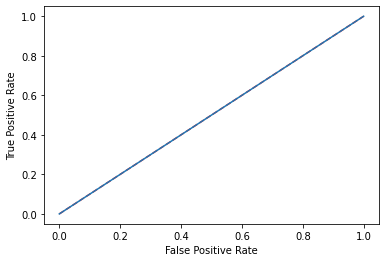

In [242]:
test_proba=xgb_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [243]:
roc_auc_score(y_test,test_proba[:,1])

0.5

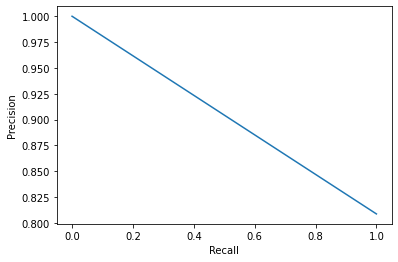

In [244]:
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [245]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.30, random_state = 55,shuffle=True)

In [246]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27618, 18)
(11837, 18)
(27618,)
(11837,)


In [247]:
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", 
 random_state=1234, 
 eval_metric="auc",
 eta=1e-7,
 gamma=1e-5,
scale_pos_weight=200)
xgb_classifier.fit(x_train,y_train)
test_predict=xgb_classifier.predict(x_test)
train_predict=xgb_classifier.predict(x_train)
print("Train Accuracy:",accuracy_score(y_train,train_predict))
print("Test Accuracy:",accuracy_score(y_test,test_predict))

Train Accuracy: 0.8187776088058513
Test Accuracy: 0.8136352116245671


[[  35 2205]
 [   1 9596]]


<AxesSubplot:>

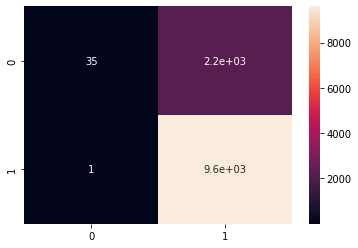

In [248]:
confusion_xgb=metrics.confusion_matrix(y_test,test_predict)
print(confusion_xgb)
sns.heatmap(confusion_xgb,annot=True)

In [249]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.97      0.02      0.03      2240
           1       0.81      1.00      0.90      9597

    accuracy                           0.81     11837
   macro avg       0.89      0.51      0.46     11837
weighted avg       0.84      0.81      0.73     11837



In [250]:
true_positive=confusion_xgb[1,1] #predicted positive actual positive
true_negative=confusion_xgb[0,0] #predicted negative actual negative
false_positive=confusion_xgb[0,1] #predicted positive actual negative
false_negative=confusion_xgb[1,0] #predicted negative actual positive
specificity=true_negative/(false_positive+true_negative)
sensitivity=true_positive/(true_positive+false_negative)
print("Specificity",specificity)
print("Sensitivity",sensitivity)

Specificity 0.015625
Sensitivity 0.9998958007710743


Text(0, 0.5, 'True Positive Rate')

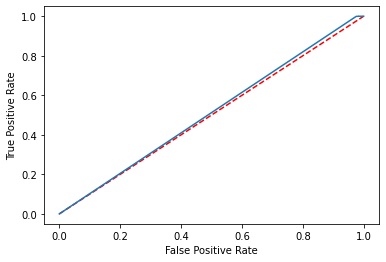

In [251]:
test_proba=xgb_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, test_proba[:,1])
plt.plot([0,1],[0,1],'r--')
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [252]:
roc_auc_score(y_test,test_proba[:,1])

0.5119173216332484

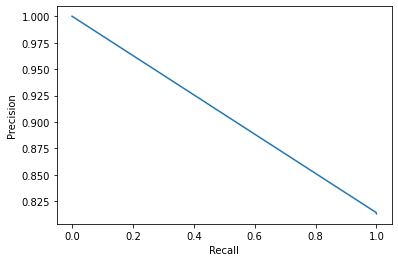

In [253]:
precision, recall, thresholds = precision_recall_curve(y_test, test_proba[:,1])
plt.plot(recall,precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

# NEURAL NETWORKS

In [72]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import seaborn as sns
from tensorflow.keras import initializers
from keras.layers import LayerNormalization

In [73]:
df_default_loan_copy=df_default_loan.copy(deep=True)

In [74]:
columns = ['revol_bal']
for column in columns:
    max = df_default_loan_copy[column].max()
    min = df_default_loan_copy[column].min()
    print("max of column", column, "is", max)
    print("min of column", column, "is", min)
    df_default_loan_copy[column] = (df_default_loan_copy[column] - min) / (max - min)

max of column revol_bal is 1207359.0
min of column revol_bal is 0.0


In [75]:
x_data = df_default_loan_copy.drop(["loan_status"], axis = 1)
y_data = df_default_loan_copy['loan_status'].values

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.40, random_state = 55,shuffle=True)

In [77]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23673, 18)
(15782, 18)
(23673,)
(15782,)


In [ ]:
class NN():
    def __init__(self):
        self.model=Sequential()
        self.model.add(Dense(units=128, input_shape=(18,), activation='selu',name='layer1'))
        self.model.add(Dense(units=128, activation='selu',name='layer2'))
        self.model.add(Dense(units=1, activation='sigmoid',name='outputlayer')) #outputlayer
        self.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    def fit(self, x_train, y_train, epochsval, batch_size_val,x_test,y_test):
        return self.model.fit(x_train, y_train, epochs=epochsval,batch_size=batch_size_val,validation_data=(x_test, y_test))
    

    def test(self, x_test, y_test, verboseval):
        return self.model.evaluate(x_test,y_test,verbose=verboseval)


nn = NN()
nn_model = nn.fit(x_train,y_train,45,15,x_test,y_test)
print(nn_model.history)
print("test")
accuracy = nn.test(x_test,y_test,0)
print(accuracy)
print('Accuracy on test data is  %.2f' % (accuracy[1]*100))

Epoch 1/45
1579/1579 [==============================] - 6s 3ms/step - loss: 141.6380 - accuracy: 0.7050 - val_loss: 103.8746 - val_accuracy: 0.1997
Epoch 2/45
1579/1579 [==============================] - 8s 5ms/step - loss: 64.2897 - accuracy: 0.7082 - val_loss: 15.8917 - val_accuracy: 0.8038
Epoch 3/45
1579/1579 [==============================] - 6s 4ms/step - loss: 32.0357 - accuracy: 0.7056 - val_loss: 19.8311 - val_accuracy: 0.8079
Epoch 4/45
1579/1579 [==============================] - 5s 3ms/step - loss: 20.9788 - accuracy: 0.7060 - val_loss: 3.9204 - val_accuracy: 0.7879
Epoch 5/45
1579/1579 [==============================] - 5s 3ms/step - loss: 16.8926 - accuracy: 0.7117 - val_loss: 3.3630 - val_accuracy: 0.8062
Epoch 6/45
1579/1579 [==============================] - 5s 3ms/step - loss: 8.6938 - accuracy: 0.7063 - val_loss: 6.6743 - val_accuracy: 0.8087
Epoch 7/45
1579/1579 [==============================] - 5s 3ms/step - loss: 6.1804 - accuracy: 0.7163 - val_loss: 4.6647 - val

In [ ]:
nn.model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               2432      
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 outputlayer (Dense)         (None, 1)                 129       
                                                                 
Total params: 19,073
Trainable params: 19,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
training_loss=nn_model.history['loss']
test_loss=nn_model.history['val_loss']
training_accuracy=nn_model.history['accuracy']
test_accuracy=nn_model.history['val_accuracy']

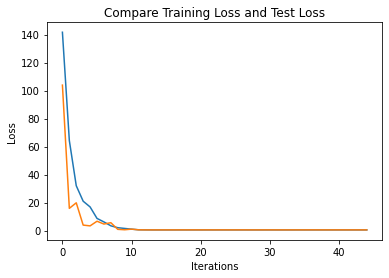

In [ ]:
plt.plot(training_loss)
plt.plot(test_loss)
plt.title('Compare Training Loss and Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

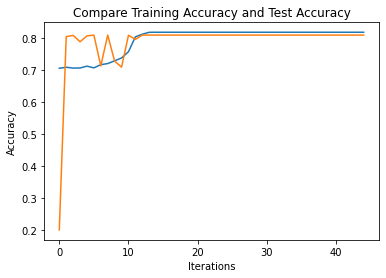

In [ ]:
plt.title('Compare Training Accuracy and Test Accuracy')
plt.plot(training_accuracy)
plt.plot(test_accuracy)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.show()

Epoch 1/30
1184/1184 [==============================] - 5s 3ms/step - loss: 0.5366 - accuracy: 0.8120 - val_loss: 0.5067 - val_accuracy: 0.8088
Epoch 2/30
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4907 - accuracy: 0.8173 - val_loss: 0.4939 - val_accuracy: 0.8088
Epoch 3/30
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4853 - accuracy: 0.8171 - val_loss: 0.4891 - val_accuracy: 0.8088
Epoch 4/30
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4770 - accuracy: 0.8177 - val_loss: 0.4884 - val_accuracy: 0.8088
Epoch 5/30
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4755 - accuracy: 0.8176 - val_loss: 0.4885 - val_accuracy: 0.8088
Epoch 6/30
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4750 - accuracy: 0.8177 - val_loss: 0.4883 - val_accuracy: 0.8088
Epoch 7/30
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4750 - accuracy: 0.8177 - val_loss: 0.4880 - val_accuracy:

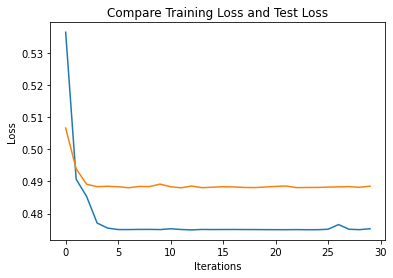

Accuracy: 80.88


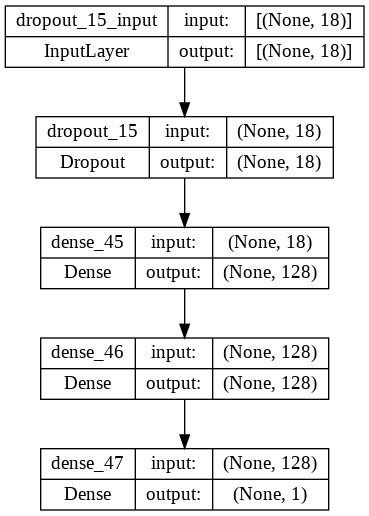

In [ ]:
# dropout - 5%, optimizer = nadam

model = Sequential()
model.add(Dropout(0.05,input_shape=(18,))) 
model.add(Dense(128, input_dim=18, activation='relu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(128, activation='relu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model_hist=model.fit(x_train, y_train, epochs=30, batch_size=5,validation_data=(x_test, y_test))
training_loss=model_hist.history['loss']
test_loss=model_hist.history['val_loss']
training_accuracy=model_hist.history['accuracy']
test_accuracy=model_hist.history['val_accuracy']
plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss,label='Test Loss')
plt.title('Compare Training Loss and Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy[1]*100))
plot_model(model, to_file='modelnn.png', show_shapes=True,)

Epoch 1/10
1184/1184 [==============================] - 5s 3ms/step - loss: 0.4783 - accuracy: 0.8170 - val_loss: 0.4885 - val_accuracy: 0.8088
Epoch 2/10
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4765 - accuracy: 0.8177 - val_loss: 0.4883 - val_accuracy: 0.8088
Epoch 3/10
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4761 - accuracy: 0.8177 - val_loss: 0.4889 - val_accuracy: 0.8088
Epoch 4/10
1184/1184 [==============================] - 4s 4ms/step - loss: 0.4768 - accuracy: 0.8177 - val_loss: 0.4880 - val_accuracy: 0.8088
Epoch 5/10
1184/1184 [==============================] - 5s 4ms/step - loss: 0.4765 - accuracy: 0.8177 - val_loss: 0.4880 - val_accuracy: 0.8088
Epoch 6/10
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4761 - accuracy: 0.8177 - val_loss: 0.4881 - val_accuracy: 0.8088
Epoch 7/10
1184/1184 [==============================] - 4s 3ms/step - loss: 0.4766 - accuracy: 0.8177 - val_loss: 0.4891 - val_accuracy:

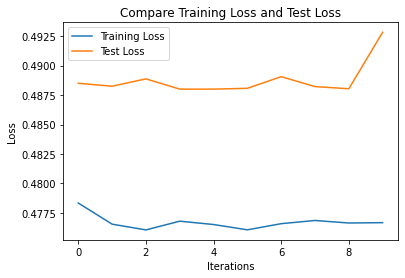

Accuracy: 80.88


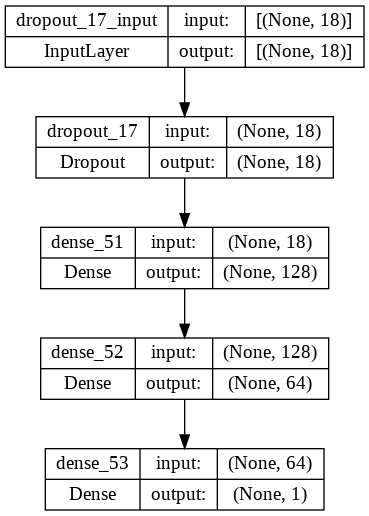

In [ ]:
#activation functions tanh,selu, sigmoid
model = Sequential()
model.add(Dropout(0.05,input_shape=(18,))) 
model.add(Dense(128, activation='tanh',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(64, activation='selu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_hist=model.fit(x_train, y_train, epochs=10, batch_size=20,validation_data=(x_test, y_test))
training_loss=model_hist.history['loss']
test_loss=model_hist.history['val_loss']
training_accuracy=model_hist.history['accuracy']
test_accuracy=model_hist.history['val_accuracy']
plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss,label='Test Loss')
plt.title('Compare Training Loss and Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy[1]*100))
plot_model(model, to_file='modelnn.png', show_shapes=True,)

Epoch 1/20
24/24 [==============================] - 1s 16ms/step - loss: 0.5206 - accuracy: 0.8164 - val_loss: 0.5206 - val_accuracy: 0.8088
Epoch 2/20
24/24 [==============================] - 0s 8ms/step - loss: 0.5102 - accuracy: 0.8177 - val_loss: 0.5199 - val_accuracy: 0.8088
Epoch 3/20
24/24 [==============================] - 0s 8ms/step - loss: 0.5098 - accuracy: 0.8177 - val_loss: 0.5198 - val_accuracy: 0.8088
Epoch 4/20
24/24 [==============================] - 0s 6ms/step - loss: 0.5108 - accuracy: 0.8177 - val_loss: 0.5209 - val_accuracy: 0.8088
Epoch 5/20
24/24 [==============================] - 0s 8ms/step - loss: 0.5076 - accuracy: 0.8177 - val_loss: 0.5194 - val_accuracy: 0.8088
Epoch 6/20
24/24 [==============================] - 0s 7ms/step - loss: 0.5100 - accuracy: 0.8177 - val_loss: 0.5215 - val_accuracy: 0.8088
Epoch 7/20
24/24 [==============================] - 0s 7ms/step - loss: 0.5087 - accuracy: 0.8177 - val_loss: 0.5190 - val_accuracy: 0.8088
Epoch 8/20
24/24 [=

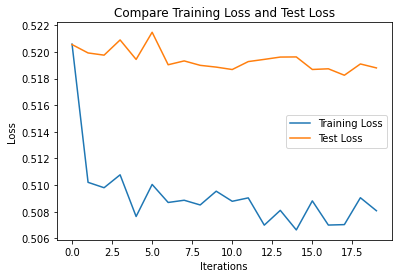

Accuracy: 80.88


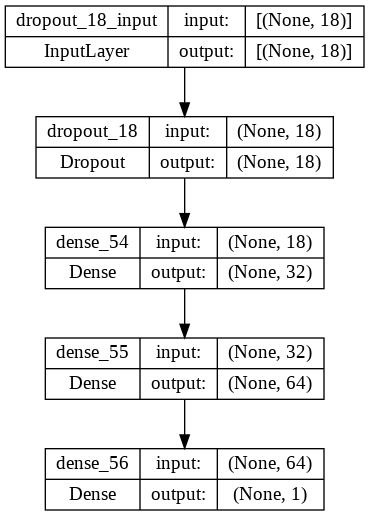

In [ ]:
# dropout - 5%, optimizer= adagrad
model = Sequential()
model.add(Dropout(0.05,input_shape=(18,))) 
model.add(Dense(32, input_dim=18, activation='relu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(64, activation='relu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
model_hist=model.fit(x_train, y_train, epochs=20, batch_size=1000,validation_data=(x_test, y_test))
training_loss=model_hist.history['loss']
test_loss=model_hist.history['val_loss']
training_accuracy=model_hist.history['accuracy']
test_accuracy=model_hist.history['val_accuracy']
plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss,label='Test Loss')
plt.title('Compare Training Loss and Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy[1]*100))
plot_model(model, to_file='modelnn.png', show_shapes=True,)

In [ ]:
from keras.callbacks import EarlyStopping

Epoch 1/15
3/3 [==============================] - 1s 177ms/step - loss: 2.7899 - accuracy: 0.5546 - val_loss: 1.3844 - val_accuracy: 0.8088
Epoch 2/15
3/3 [==============================] - 0s 35ms/step - loss: 1.2295 - accuracy: 0.8177 - val_loss: 0.7571 - val_accuracy: 0.8088
Epoch 2: early stopping


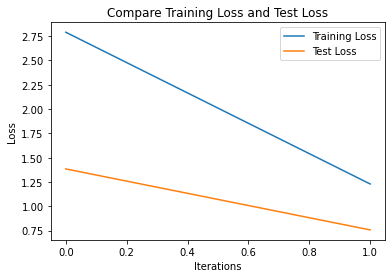

Accuracy: 80.88


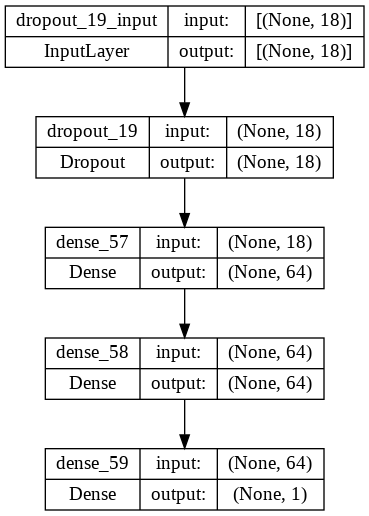

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model = Sequential()
model.add(Dropout(0.05,input_shape=(18,))) 
model.add(Dense(64, input_dim=18, activation='selu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(64, activation='relu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es_model_history = model.fit(x_train, y_train, epochs=15, batch_size=10000,callbacks=[es],validation_data=(x_test, y_test))
training_loss=es_model_history.history['loss']
test_loss=es_model_history.history['val_loss']
plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss,label='Test Loss')
plt.title('Compare Training Loss and Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy[1]*100))
plot_model(model, to_file='modelnn.png', show_shapes=True,)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.50, random_state = 55,shuffle=True)

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19727, 18)
(19728, 18)
(19727,)
(19728,)


Epoch 1/30
198/198 [==============================] - 5s 15ms/step - loss: 0.6077 - accuracy: 0.8055 - val_loss: 0.5188 - val_accuracy: 0.8102
Epoch 2/30
198/198 [==============================] - 1s 7ms/step - loss: 0.5100 - accuracy: 0.8181 - val_loss: 0.5099 - val_accuracy: 0.8102
Epoch 3/30
198/198 [==============================] - 1s 5ms/step - loss: 0.5027 - accuracy: 0.8181 - val_loss: 0.5100 - val_accuracy: 0.8102
Epoch 4/30
198/198 [==============================] - 1s 5ms/step - loss: 0.4969 - accuracy: 0.8181 - val_loss: 0.5013 - val_accuracy: 0.8102
Epoch 5/30
198/198 [==============================] - 1s 5ms/step - loss: 0.4939 - accuracy: 0.8181 - val_loss: 0.5007 - val_accuracy: 0.8102
Epoch 6/30
198/198 [==============================] - 1s 5ms/step - loss: 0.4937 - accuracy: 0.8159 - val_loss: 0.4958 - val_accuracy: 0.8102
Epoch 7/30
198/198 [==============================] - 2s 8ms/step - loss: 0.4900 - accuracy: 0.8175 - val_loss: 0.4959 - val_accuracy: 0.8102
Epoch

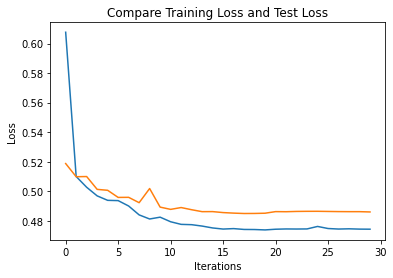

Accuracy: 81.02


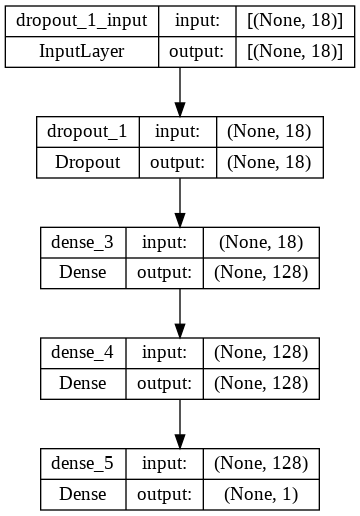

In [84]:
# dropout - 5%, optimizer = nadam

model = Sequential()
model.add(Dropout(0.05,input_shape=(18,))) 
model.add(Dense(128, input_dim=18, activation='relu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(128, activation='relu',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(1, activation='sigmoid',kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])
model_hist=model.fit(x_train, y_train, epochs=30, batch_size=100,validation_data=(x_test, y_test))
training_loss=model_hist.history['loss']
test_loss=model_hist.history['val_loss']
training_accuracy=model_hist.history['accuracy']
test_accuracy=model_hist.history['val_accuracy']
plt.plot(training_loss, label='Training Loss')
plt.plot(test_loss,label='Test Loss')
plt.title('Compare Training Loss and Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy[1]*100))
plot_model(model, to_file='modelnn.png', show_shapes=True,)

# SUMMARY OF MODELS

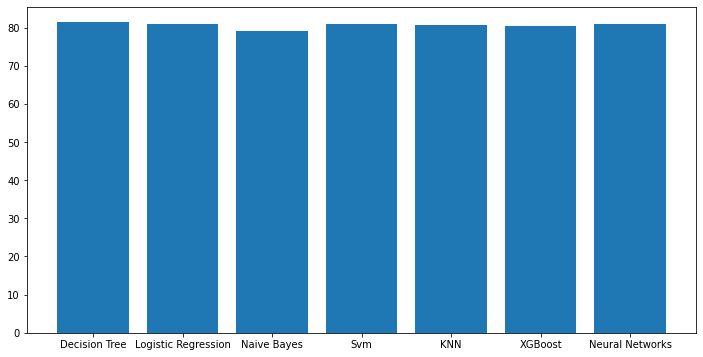

In [296]:
test_accuracies={"Decision Tree":81.4,
                "Logistic Regression":80.9,
                "Naive Bayes":79.1,
                "Svm":80.8,
                "KNN":80.71,
                "XGBoost":80.3,
                "Neural Networks":80.8}
keys=list(test_accuracies.keys())
values=list(test_accuracies.values())
plt.figure(figsize=(12,6))
plt.bar(range(len(test_accuracies)), values, tick_label=keys)
plt.show()

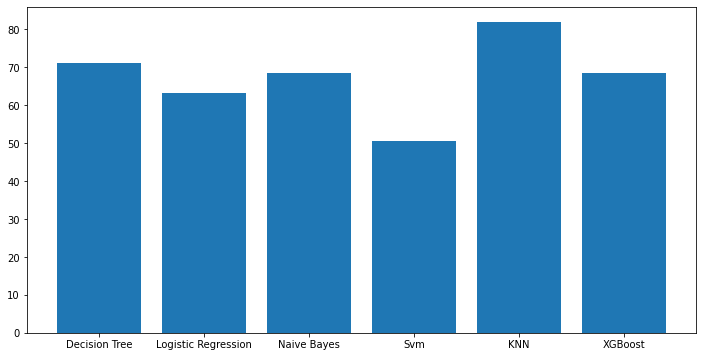

In [295]:
roc_auc_accuracies={"Decision Tree":71.2,
                "Logistic Regression":63.16,
                "Naive Bayes":68.5,
                "Svm":50.5,
                "KNN":81.9,
                "XGBoost":68.5}
keys=list(roc_auc_accuracies.keys())
values=list(roc_auc_accuracies.values())
plt.figure(figsize=(12,6))
plt.bar(range(len(roc_auc_accuracies)), values, tick_label=keys)
plt.show()